In [3]:
import pandas as pd
import datetime
from joblib import dump, load

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit as tss
from sklearn import metrics

In [4]:
%config IPCompleter.greedy = True

In [5]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 100)

In [6]:
# I use sql to get the January data from 2018. And I save the January data as a csv file.

In [7]:
df1 = pd.read_csv("jan_data.csv")

In [8]:
#add column features (to modify the little error of sql )
#https://zhuanlan.zhihu.com/p/341400424
df1.columns = ['dayofservice','tripid','lineid','planned_arr_T','planned_dep_T',
                  'arrival_time_T','departure_time_T','progrnumber','stoppointid','planned_arr_L','planned_dep_L','arrival_time_L','departure_time_L','vehicleid','lastupdate']

In [9]:
#add a row at the top in Pandas dataframe
#https://re-thought.com/how-to-add-a-row-at-the-top-in-pandas-dataframe/

In [10]:
# way of adding a row to the top of Pandas dataframe
df1.loc[-1] = ['2018-01-06 00:00:00', 5955221, '14', 42553, 37800, '42078','37836', 7,234, 38205, 38205.1, 38205.2,38231, 2693254,'2018-01-15 08:25:25'] 
# adding a row
df1.index = df1.index + 1  # shifting index
df1.sort_index(inplace=True)

In [11]:
df1.head(50)

dayofservice   tripid lineid  planned_arr_T  planned_dep_T  \
0   2018-01-06 00:00:00  5955221     14          42553          37800   
1   2018-01-06 00:00:00  5955221     14          42553          37800   
2   2018-01-06 00:00:00  5955221     14          42553          37800   
3   2018-01-06 00:00:00  5955221     14          42553          37800   
4   2018-01-06 00:00:00  5955221     14          42553          37800   
5   2018-01-06 00:00:00  5955221     14          42553          37800   
6   2018-01-06 00:00:00  5955221     14          42553          37800   
7   2018-01-06 00:00:00  5955221     14          42553          37800   
8   2018-01-06 00:00:00  5955221     14          42553          37800   
9   2018-01-06 00:00:00  5955221     14          42553          37800   
10  2018-01-06 00:00:00  5955221     14          42553          37800   
11  2018-01-06 00:00:00  5955221     14          42553          37800   
12  2018-01-06 00:00:00  5955221     14          42553          37800   
13  2018-01-06 00:00:00  5955221     14          42553          37800   
14  2018-01-06 00:00:00  5955221     14          42553          37800   
15  2018-01-06 00:00:00  5955221     14          42553          37800   
16  2018-01-06 00:00:00  5955221     14          42553          37800   
17  2018-01-06 00:00:00  5955221     14          42553          37800   
18  2018-01-06 00:00:00  5955221     14          42553          37800   
19  2018-01-06 00:00:00  5955221     14          42553          37800   
20  2018-01-06 00:00:00  5955221     14          42553          37800   
21  2018-01-06 00:00:00  5955221     14          42553          37800   
22  2018-01-06 00:00:00  5955221     14          42553          37800   
23  2018-01-06 00:00:00  5955221     14          42553          37800   
24  2018-01-06 00:00:00  5955221     14          42553          37800   
25  2018-01-06 00:00:00  5955221     14          42553          37800   
26  2018-01-06 00:00:00  5955221     14          42553          37800   
27  2018-01-06 00:00:00  5955221     14          42553          37800   
28  2018-01-06 00:00:00  5955221     14          42553          37800   
29  2018-01-06 00:00:00  5955221     14          42553          37800   
30  2018-01-06 00:00:00  5955221     14          42553          37800   
31  2018-01-06 00:00:00  5955221     14          42553          37800   
32  2018-01-06 00:00:00  5955221     14          42553          37800   
33  2018-01-06 00:00:00  5955221     14          42553          37800   
34  2018-01-06 00:00:00  5955221     14          42553          37800   
35  2018-01-06 00:00:00  5955221     14          42553          37800   
36  2018-01-06 00:00:00  5955221     14          42553          37800   
37  2018-01-06 00:00:00  5955221     14          42553          37800   
38  2018-01-06 00:00:00  5955221     14          42553          37800   
39  2018-01-06 00:00:00  5955221     14          42553          37800   
40  2018-01-06 00:00:00  5955221     14          42553          37800   
41  2018-01-06 00:00:00  5955221     14          42553          37800   
42  2018-01-06 00:00:00  5955221     14          42553          37800   
43  2018-01-06 00:00:00  5955221     14          42553          37800   
44  2018-01-06 00:00:00  5955221     14          42553          37800   
45  2018-01-06 00:00:00  5955221     14          42553          37800   
46  2018-01-06 00:00:00  5955221     14          42553          37800   
47  2018-01-06 00:00:00  5955221     14          42553          37800   
48  2018-01-06 00:00:00  5955221     14          42553          37800   
49  2018-01-06 00:00:00  5955221     14          42553          37800   

   arrival_time_T departure_time_T  progrnumber  stoppointid  planned_arr_L  \
0           42078            37836            7          234          38205   
1           42078            37836            8          235          38271   
2           42078            37836           45   

In [12]:
df1.tail(50)

dayofservice   tripid lineid  planned_arr_T  planned_dep_T  \
10524954  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524955  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524956  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524957  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524958  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524959  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524960  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524961  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524962  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524963  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524964  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524965  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524966  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524967  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524968  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524969  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524970  2018-01-30 00:00:00  6245816    46A          28500          25800   
10524971  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524972  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524973  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524974  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524975  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524976  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524977  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524978  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524979  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524980  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524981  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524982  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524983  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524984  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524985  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524986  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524987  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524988  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524989  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524990  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524991  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524992  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524993  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524994  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524995  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524996  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524997  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524998  2018-01-31 00:00:00  6245816    46A          28500          25800   
10524999  2018-01-31 00:00:00  6245816    46A          28500          25800   
10525000  2018-01-31 00:00:00  6245816    46A          28500          25800   
10525001  2018-01-31 00:00:00  6245816    46A          28500          25800   
10525002  2018-01-31 00:00:00  6245816    46A          28500          25800   
10525003  2018-01-31 00:00:00  6245816    46A          28500       

In [13]:
print("Rows:",df1.shape[0])
print("Columns:",df1.shape[1])

Rows: 10525004
Columns: 15


In [14]:
df1.dtypes

dayofservice         object
tripid                int64
lineid               object
planned_arr_T         int64
planned_dep_T         int64
arrival_time_T       object
departure_time_T     object
progrnumber           int64
stoppointid           int64
planned_arr_L         int64
planned_dep_L       float64
arrival_time_L      float64
departure_time_L      int64
vehicleid             int64
lastupdate           object
dtype: object

In [15]:
# methord:
# continuous features (int 64 & float 64)

# dayofservice (object ---> int64)
# lineid (object ---> categorical)
# arrival_time_T (object ---> float64)
# departure_time_T (object ---> float64)

# lastupdate (object ---> int64)

In [16]:
categorical_columns = df1[['lineid']].columns
continuous_columns = df1[['planned_arr_T','planned_dep_T','arrival_time_T','departure_time_T','progrnumber','stoppointid','planned_arr_L','planned_dep_L','arrival_time_L','departure_time_L','vehicleid','tripid']].columns
datetime_columns = df1[['dayofservice', 'lastupdate']].columns

for column in categorical_columns:
    df1[column] = df1[column].astype('category')  

for column in datetime_columns:
    df1[column] = pd.to_datetime(df1[column]).astype('int64')  
    
df1.dtypes

dayofservice           int64
tripid                 int64
lineid              category
planned_arr_T          int64
planned_dep_T          int64
arrival_time_T        object
departure_time_T      object
progrnumber            int64
stoppointid            int64
planned_arr_L          int64
planned_dep_L        float64
arrival_time_L       float64
departure_time_L       int64
vehicleid              int64
lastupdate             int64
dtype: object

In [17]:
#https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python
df1 = df1.convert_objects(convert_numeric=True)
df1.dtypes

/home/team12/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


dayofservice           int64
tripid                 int64
lineid              category
planned_arr_T          int64
planned_dep_T          int64
arrival_time_T       float64
departure_time_T     float64
progrnumber            int64
stoppointid            int64
planned_arr_L          int64
planned_dep_L        float64
arrival_time_L       float64
departure_time_L       int64
vehicleid              int64
lastupdate             int64
dtype: object

In [18]:
# continuous_columns = df[['TripID','TPlannedTime_Arr','TPlannedTime_Dep','TActualTime_Arr','TActualTime_Dep','progrnumber','stoppointid','Lplannedtime_arr','Lplannedtime_dep','Lactualtime_arr','Lactualtime_dep','vehicleid']].columns
# #'planned_arr_T','planned_dep_T','arrival_time_T','departure_time_T','progrnumber','stoppointid','planned_arr_L','planned_dep_L','arrival_time_L','departure_time_L','vehicleid','tripid'

In [19]:
# check data

In [20]:
df1.select_dtypes(['category']).describe().T

count unique  top    freq
lineid  10525004    126  46A  400587

In [21]:
df1.select_dtypes(['int64']).describe().T

count          mean           std           min  \
dayofservice      10525004.0  1.516073e+18  7.680967e+14  1.514765e+18   
tripid            10525004.0  6.121299e+06  9.382799e+04  5.955221e+06   
planned_arr_T     10525004.0  5.558728e+04  1.726703e+04  1.843200e+04   
planned_dep_T     10525004.0  5.161347e+04  1.747011e+04  1.620000e+04   
progrnumber       10525004.0  3.116223e+01  1.998223e+01  1.000000e+00   
stoppointid       10525004.0  2.507552e+03  2.007388e+03  2.000000e+00   
planned_arr_L     10525004.0  5.361669e+04  1.740743e+04  1.620000e+04   
departure_time_L  10525004.0  5.368621e+04  1.740110e+04  1.630000e+04   
vehicleid         10525004.0  1.941504e+06  7.577496e+05  1.000110e+06   
lastupdate        10525004.0  1.516890e+18  9.576947e+14  1.515432e+18   

                           25%           50%           75%           max  
dayofservice      1.515456e+18  1.516061e+18  1.516752e+18  1.517357e+18  
tripid            6.092956e+06  6.111909e+06  6.219260e+06  6.245816e+06  
planned_arr_T     4.036700e+04  5.602300e+04  6.949900e+04  9.121700e+04  
planned_dep_T     3.660000e+04  5.178000e+04  6.540000e+04  8.760000e+04  
progrnumber       1.500000e+01  2.900000e+01  4.500000e+01  1.030000e+02  
stoppointid       9.480000e+02  1.989000e+03  3.712000e+03  7.667000e+03  
planned_arr_L     3.843300e+04  5.391700e+04  6.752600e+04  9.121700e+04  
departure_time_L  3.847400e+04  5.400100e+04  6.762500e+04  9.309200e+04  
vehicleid         1.001060e+06  2.172274e+06  2.693204e+06  2.868407e+06  
lastupdate        1.516176e+18  1.516891e+18  1.517433e+18  1.519813e+18

In [22]:
df1.select_dtypes(['float64']).describe().T

count          mean           std      min      25%  \
arrival_time_T    10006992.0  55377.089679  17115.191428  17814.0  40254.0   
departure_time_T   9863339.0  51825.876895  17387.014088  16300.0  36901.0   
planned_dep_L     10525004.0  53616.686202  17407.433809  16200.0  38433.0   
arrival_time_L    10525004.0  53674.412735  17402.128549  16300.0  38464.0   

                      50%      75%      max  
arrival_time_T    55683.0  69172.0  93092.0  
departure_time_T  52147.0  65424.0  88843.0  
planned_dep_L     53917.0  67526.0  91217.0  
arrival_time_L    53988.0  67613.0  93092.0

In [23]:
#check duplicate

In [24]:
print('duplicate rows: ', df1.duplicated().sum())


duplicate rows:  0


In [25]:
#check again
print('duplicate rows:', df1[df1.duplicated(keep=False)].shape[0])

duplicate rows: 0


In [26]:
df1.isnull().sum()

dayofservice             0
tripid                   0
lineid                   0
planned_arr_T            0
planned_dep_T            0
arrival_time_T      518012
departure_time_T    661665
progrnumber              0
stoppointid              0
planned_arr_L            0
planned_dep_L            0
arrival_time_L           0
departure_time_L         0
vehicleid                0
lastupdate               0
dtype: int64

In [27]:
columns_perc_missing  = 100 * (df1.isnull().sum()/df1.shape[0])

In [28]:
df_perc_missing = pd.DataFrame(columns_perc_missing, columns=['%missing'])
df_perc_missing

%missing
dayofservice      0.000000
tripid            0.000000
lineid            0.000000
planned_arr_T     0.000000
planned_dep_T     0.000000
arrival_time_T    4.921727
departure_time_T  6.286601
progrnumber       0.000000
stoppointid       0.000000
planned_arr_L     0.000000
planned_dep_L     0.000000
arrival_time_L    0.000000
departure_time_L  0.000000
vehicleid         0.000000
lastupdate        0.000000

In [29]:
# we use the 2018 data for the ML

In [30]:
# Difference between 2018 data and 2022 data

In [31]:
# When the routes only exist in the 2018 data (not in the 2022 data), I decide to ignore the changes.

In [32]:
#explore the data features

In [33]:
df1_sample = df1.sample(n=10000, random_state=1)

In [34]:
#continuous

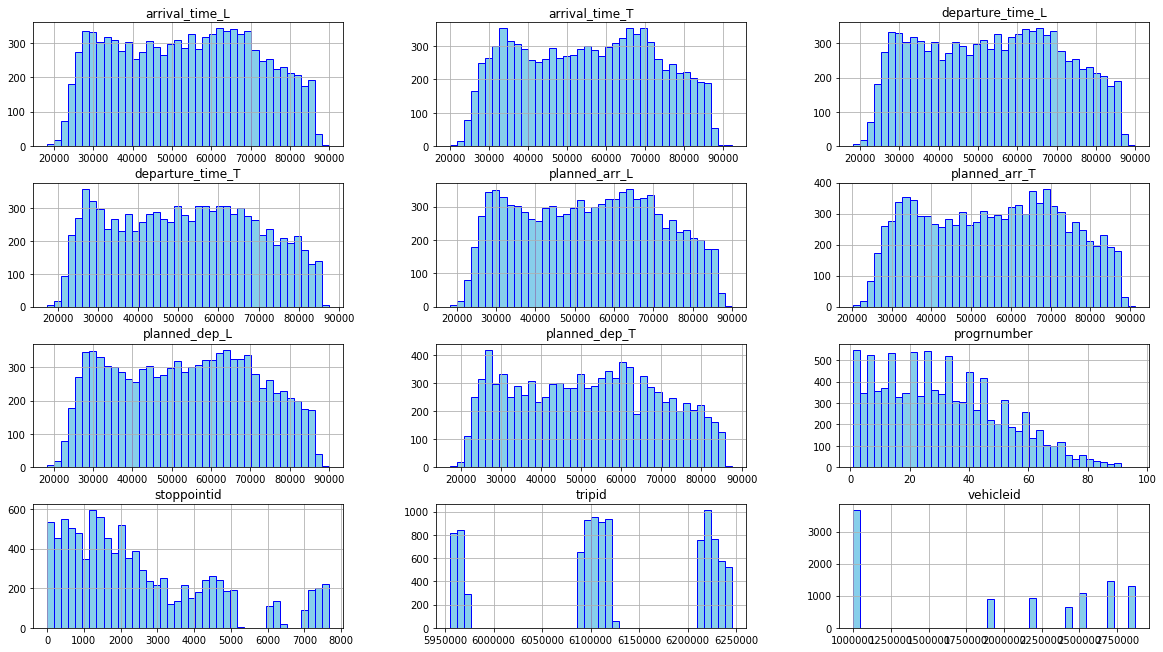

In [35]:
#https://stackoverflow.com/questions/42172440/python-matplotlib-histogram-color
#https://matplotlib.org/stable/gallery/statistics/hist.html
df1_sample[continuous_columns].hist(layout=(7, 3), figsize=(20,20), bins=40,color = "skyblue", ec="blue")
plt.show()

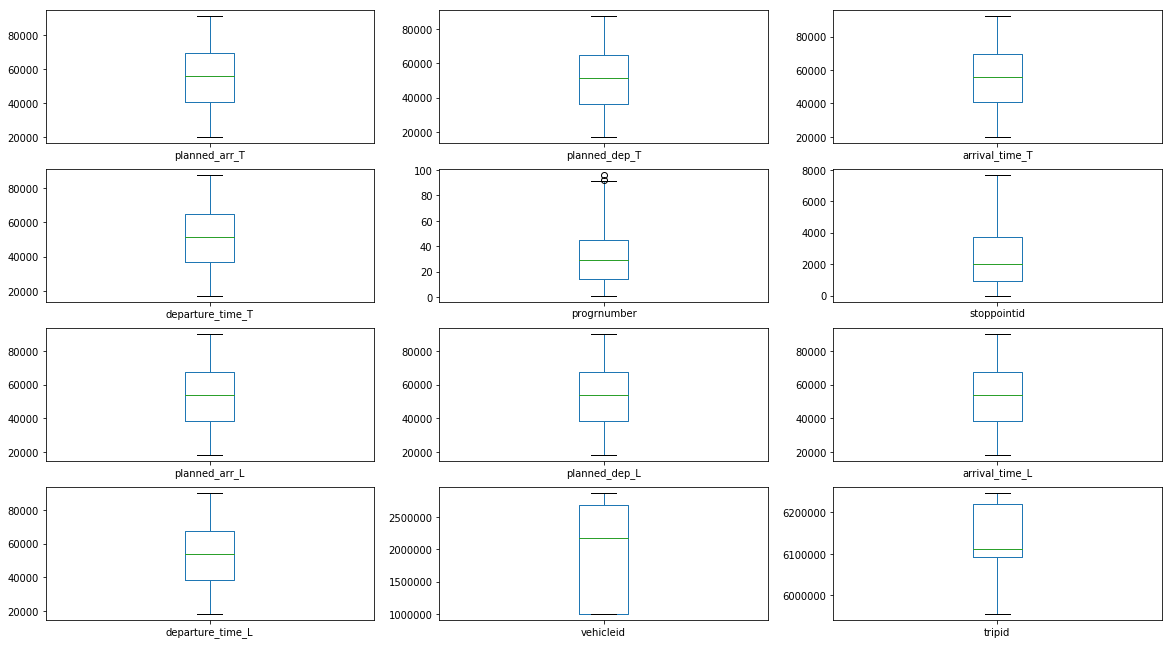

In [36]:
df1_sample[continuous_columns].dropna().astype('int64').plot(kind='box', subplots=True, figsize=(20,20), layout=(7,3), sharex=False, sharey=False)
plt.show()

In [37]:
corr = df1_sample[continuous_columns].corr()
corr

planned_arr_T  planned_dep_T  arrival_time_T  \
planned_arr_T          1.000000       0.997375        0.999362   
planned_dep_T          0.997375       1.000000        0.996825   
arrival_time_T         0.999362       0.996825        1.000000   
departure_time_T       0.997291       0.999939        0.996820   
progrnumber            0.006237      -0.017475        0.003228   
stoppointid            0.007254       0.008712        0.006497   
planned_arr_L          0.996716       0.996677        0.996106   
planned_dep_L          0.996716       0.996677        0.996106   
arrival_time_L         0.996406       0.996478        0.996329   
departure_time_L       0.996412       0.996474        0.996338   
vehicleid              0.064371       0.055235        0.061737   
tripid                -0.008548      -0.005417        0.007338   

                  departure_time_T  progrnumber  stoppointid  planned_arr_L  \
planned_arr_T             0.997291     0.006237     0.007254       0.996716   
planned_dep_T             0.999939    -0.017475     0.008712       0.996677   
arrival_time_T            0.996820     0.003228     0.006497       0.996106   
departure_time_T          1.000000    -0.018591     0.009221       0.996578   
progrnumber              -0.018591     1.000000    -0.013650       0.058029   
stoppointid               0.009221    -0.013650     1.000000       0.008170   
planned_arr_L             0.996578     0.058029     0.008170       1.000000   
planned_dep_L             0.996578     0.058029     0.008170       1.000000   
arrival_time_L            0.996461     0.058540     0.008245       0.999755   
departure_time_L          0.996457     0.058525     0.008147       0.999753   
vehicleid                 0.055702     0.059270    -0.039132       0.059607   
tripid                   -0.005965     0.009043    -0.010029      -0.007162   

                  planned_dep_L  arrival_time_L  departure_time_L  vehicleid  \
planned_arr_T          0.996716        0.996406          0.996412   0.064371   
planned_dep_T          0.996677        0.996478          0.996474   0.055235   
arrival_time_T         0.996106        0.996329          0.996338   0.061737   
departure_time_T       0.996578        0.996461          0.996457   0.055702   
progrnumber            0.058029        0.058540          0.058525   0.059270   
stoppointid            0.008170        0.008245          0.008147  -0.039132   
planned_arr_L          1.000000        0.999755          0.999753   0.059607   
planned_dep_L          1.000000        0.999755          0.999753   0.059607   
arrival_time_L         0.999755        1.000000          0.999999   0.059245   
departure_time_L       0.999753        0.999999          1.000000   0.059258   
vehicleid              0.059607        0.059245          0.059258   1.000000   
tripid                -0.007162        0.000138          0.000140  -0.001701   

                    tripid  
planned_arr_T    -0.008548  
planned_dep_T    -0.005417  
arrival_time_T    0.007338  
departure_time_T -0.005965  
progrnumber       0.009043  
stoppointid      -0.010029  
planned_arr_L    -0.007162  
planned_dep_L    -0.007162  
arrival_time_L    0.000138  
departure_time_L  0.000140  
vehicleid        -0.001701  
tripid            1.000000

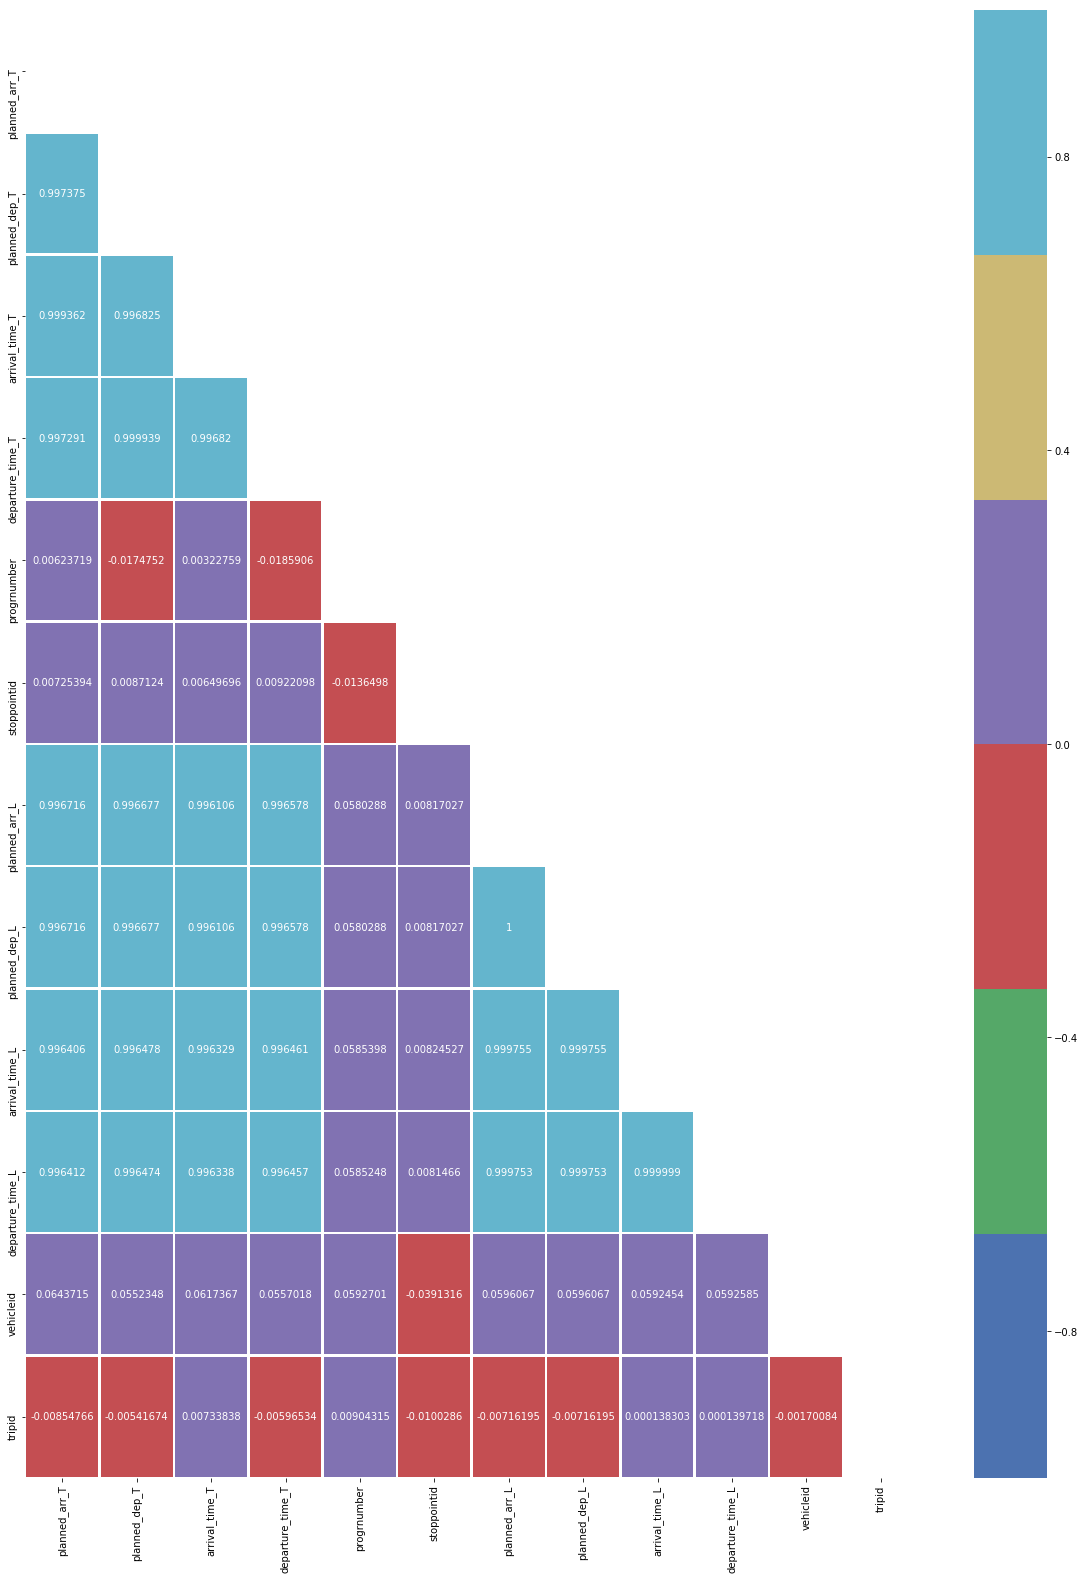

In [38]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (20,27))
# tab10
# deep, 
# muted, 
# pastel, 
# bright, 
# dark, 
# colorblind
color = sns.color_palette("deep",6)
sns.heatmap(corr, cmap=color, annot=True, fmt='g', vmax=1, vmin=-1,linewidths=1.5, mask=mask)

/home/team12/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


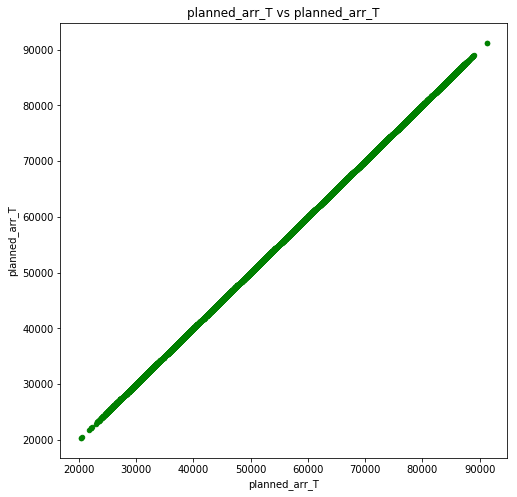

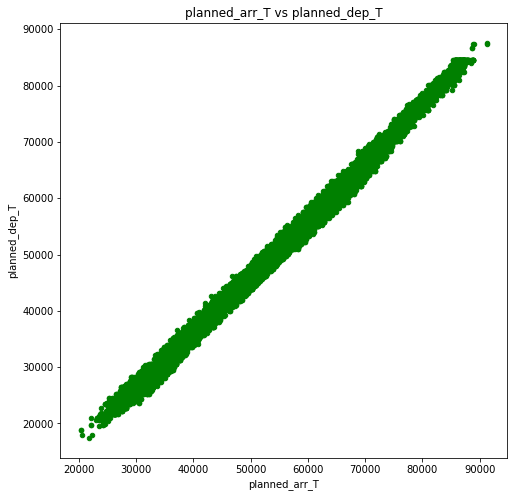

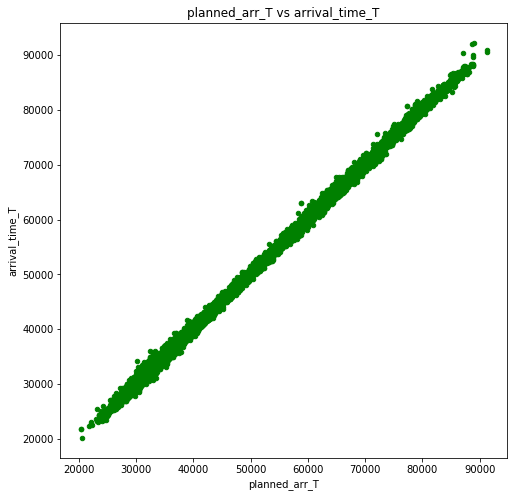

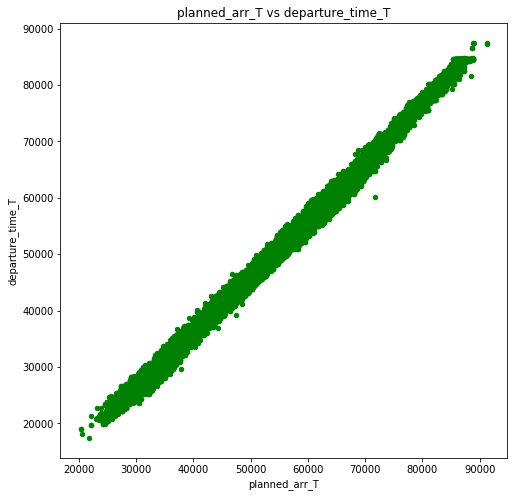

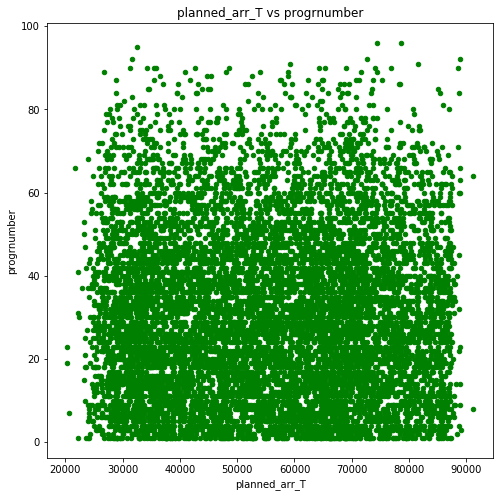

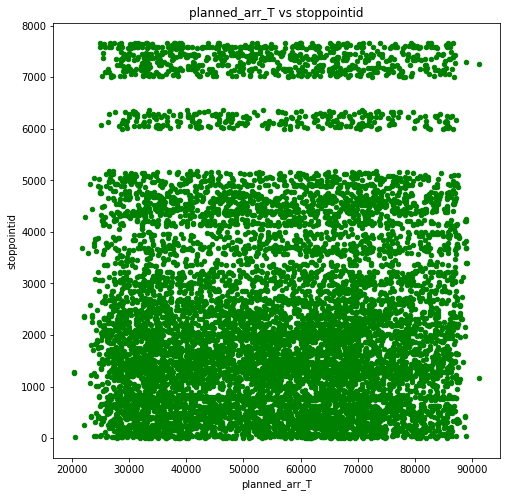

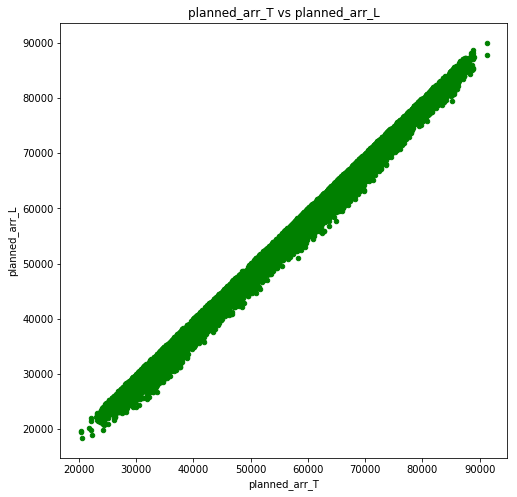

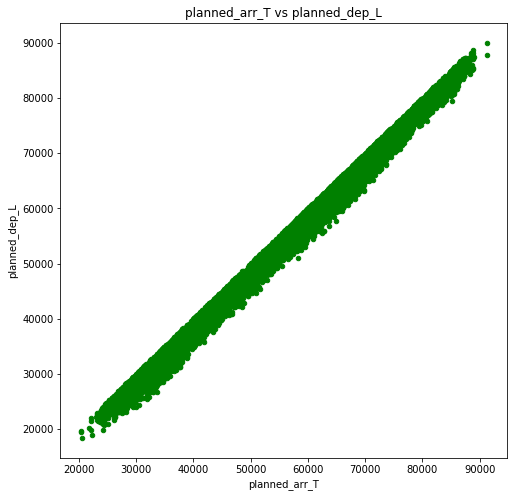

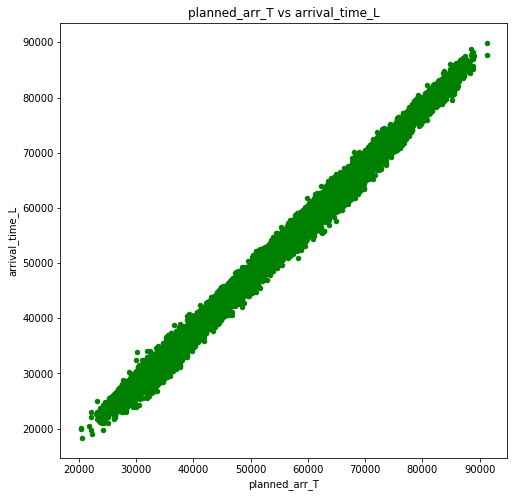

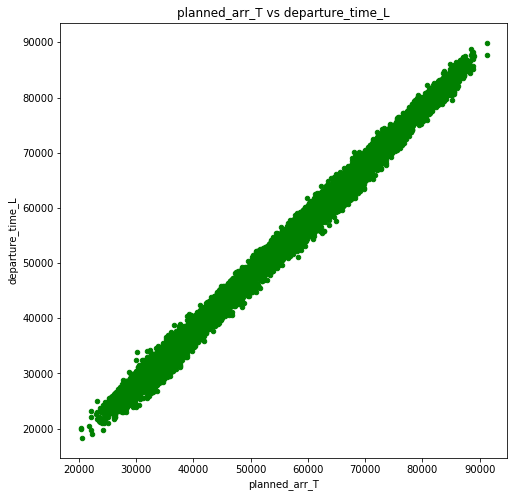

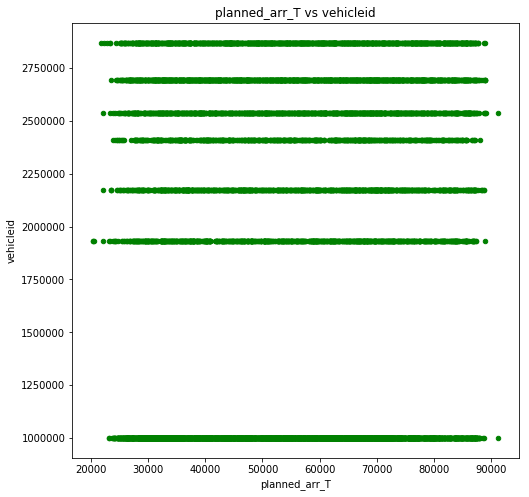

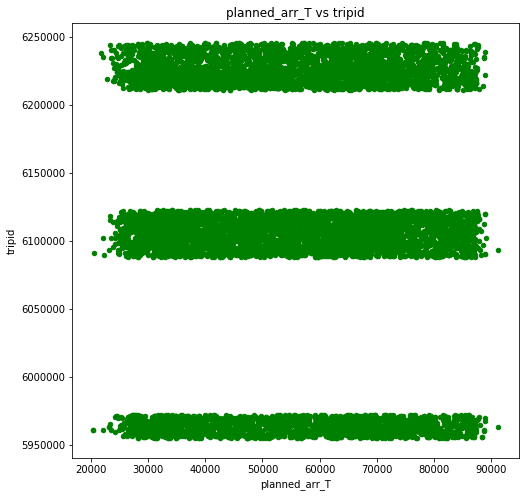

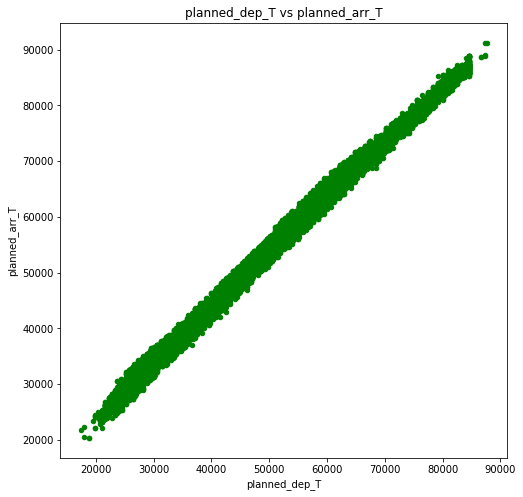

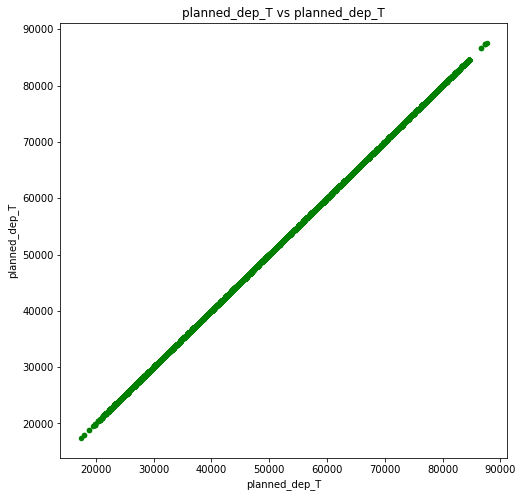

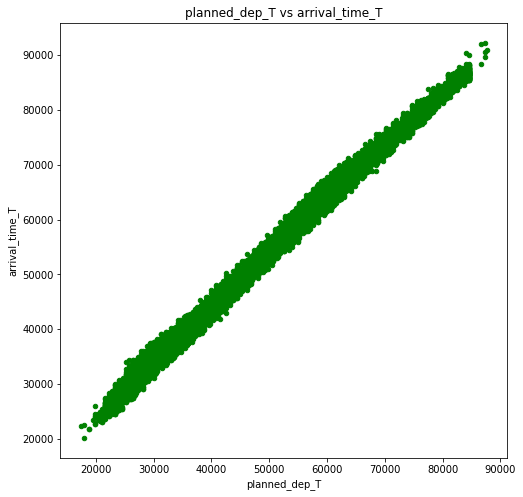

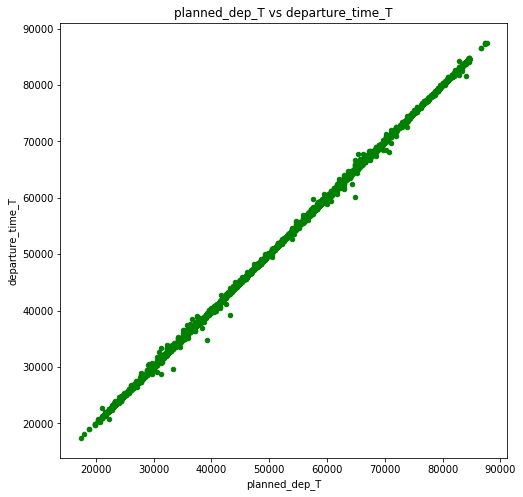

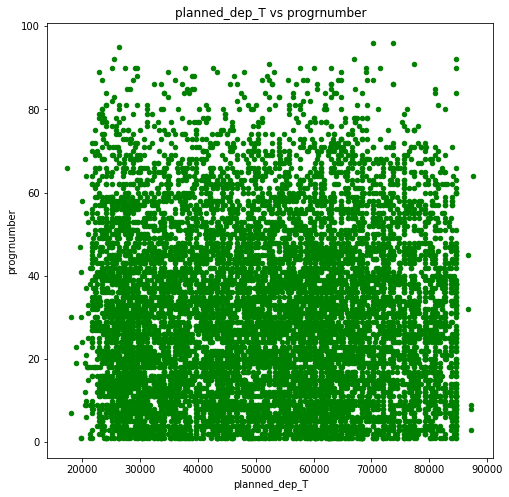

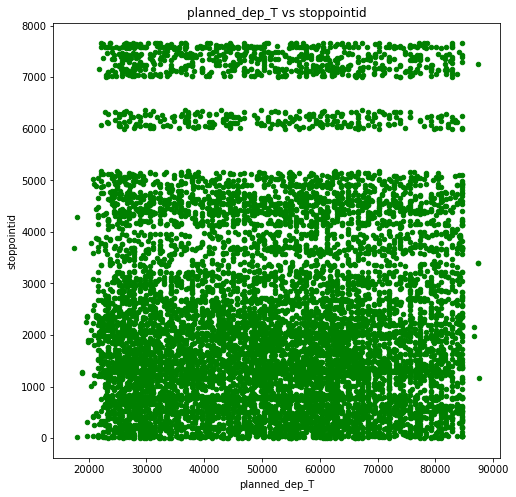

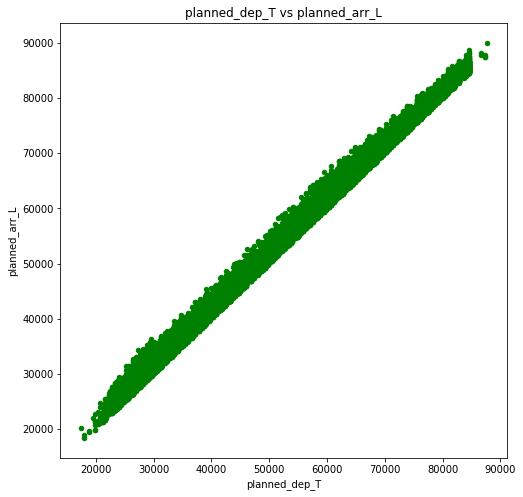

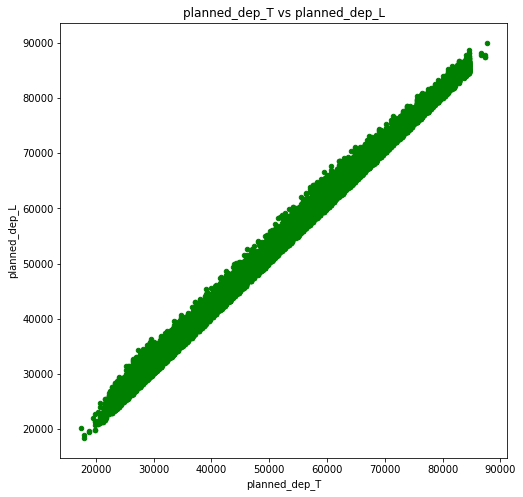

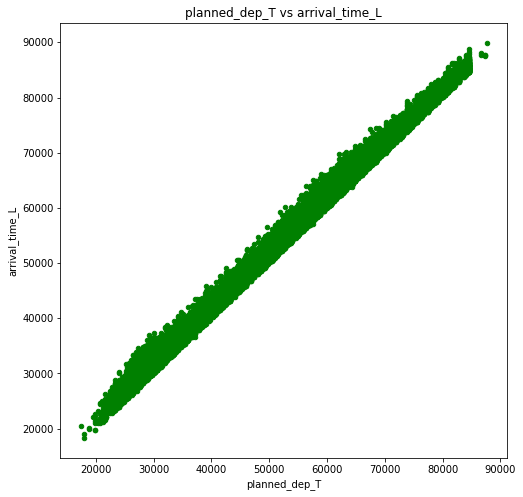

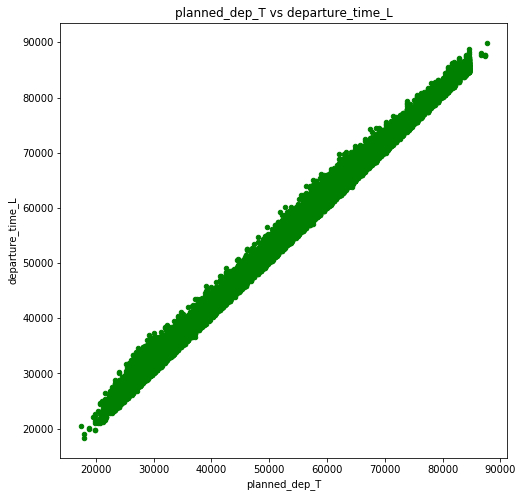

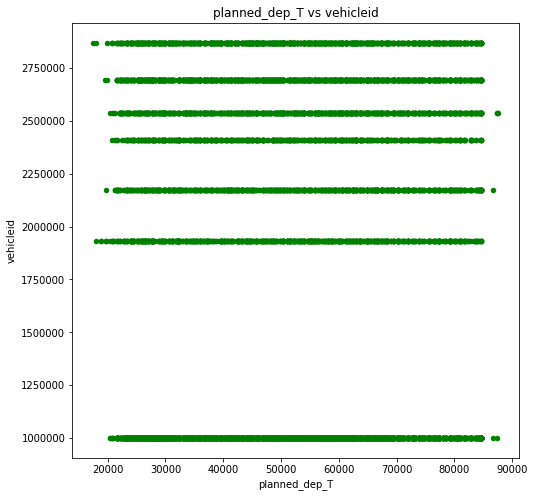

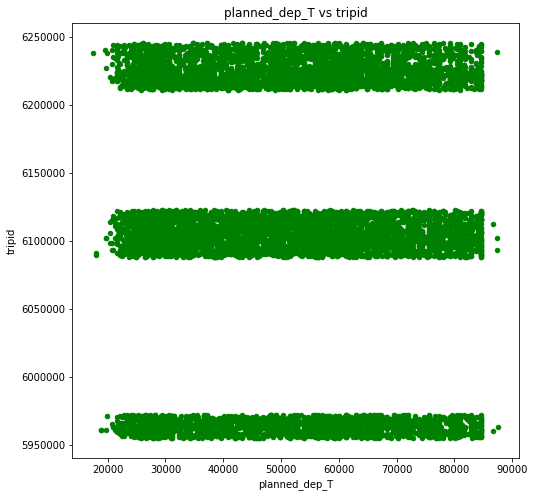

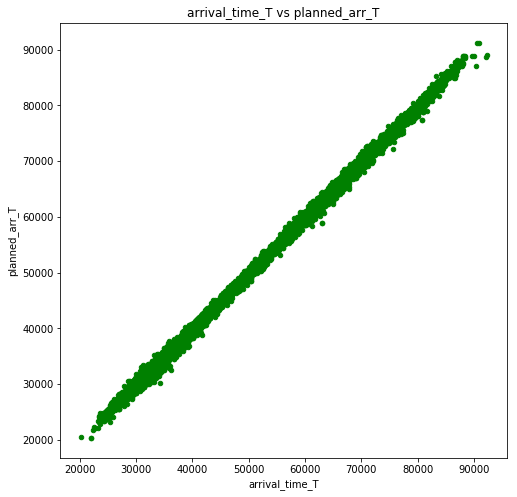

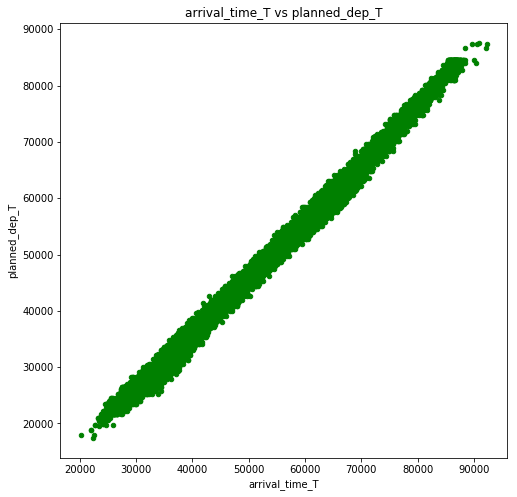

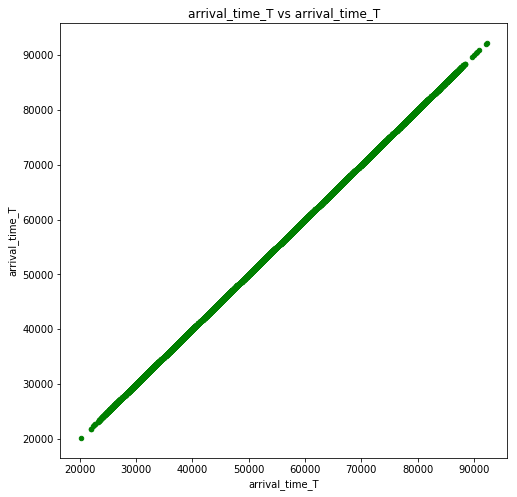

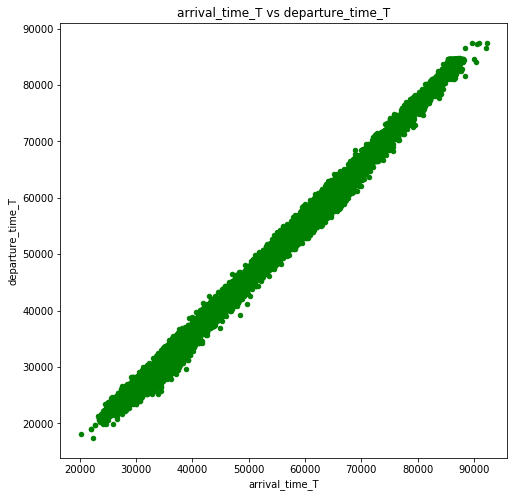

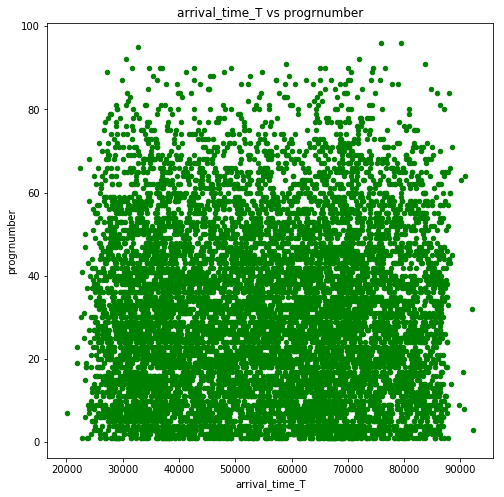

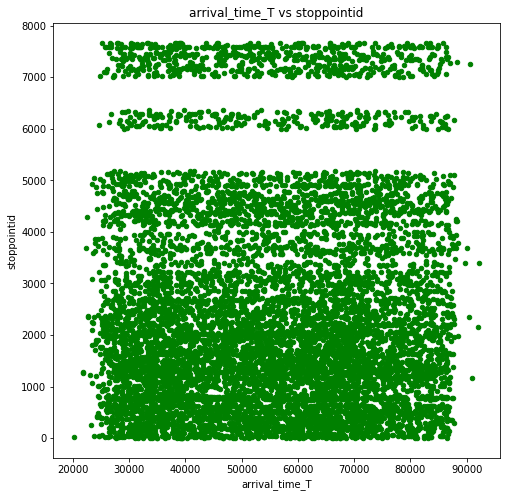

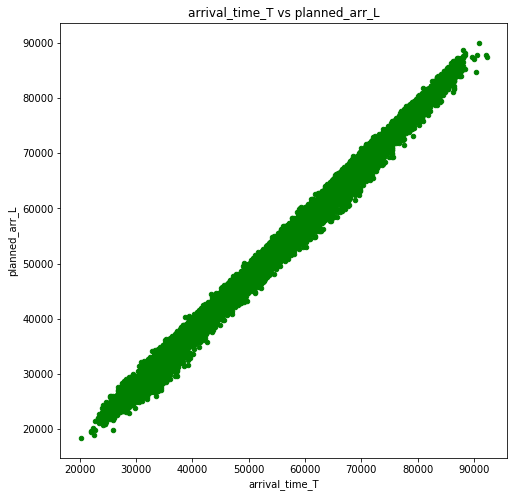

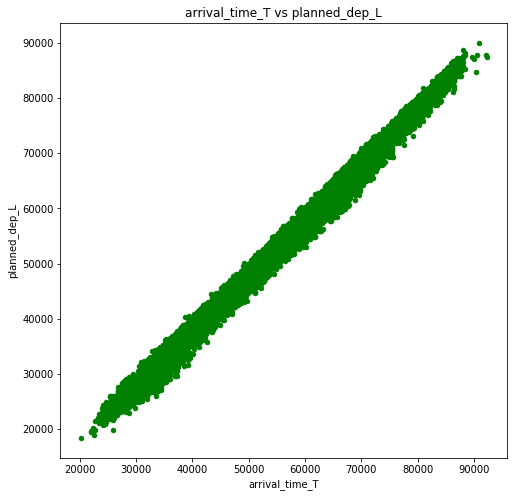

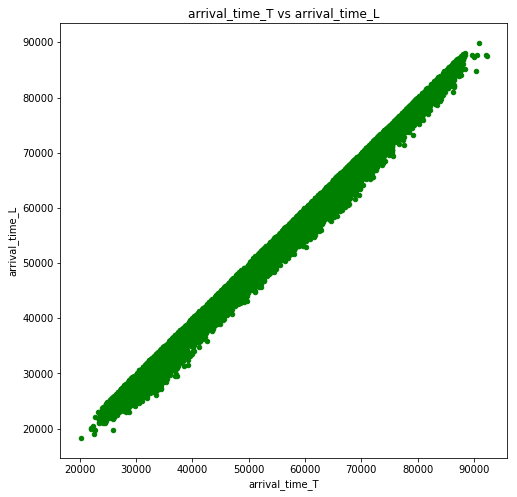

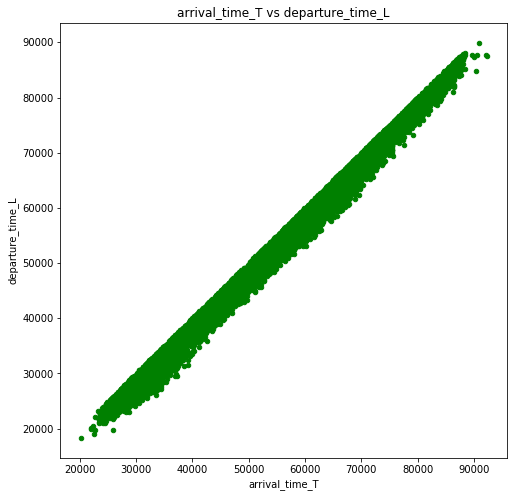

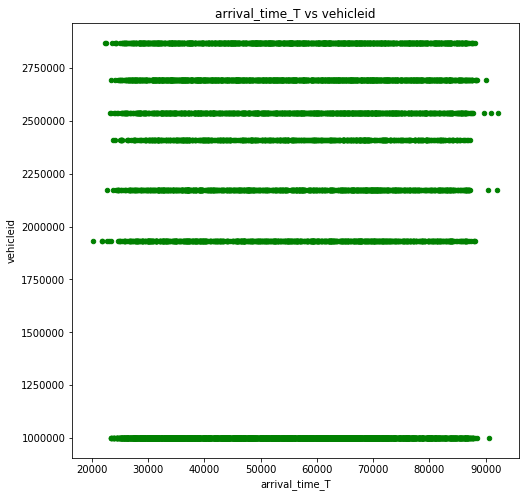

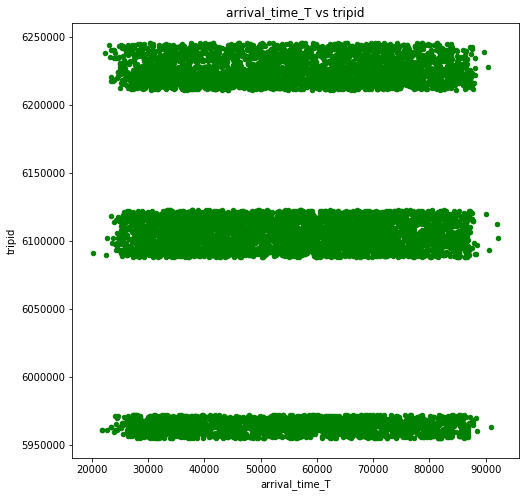

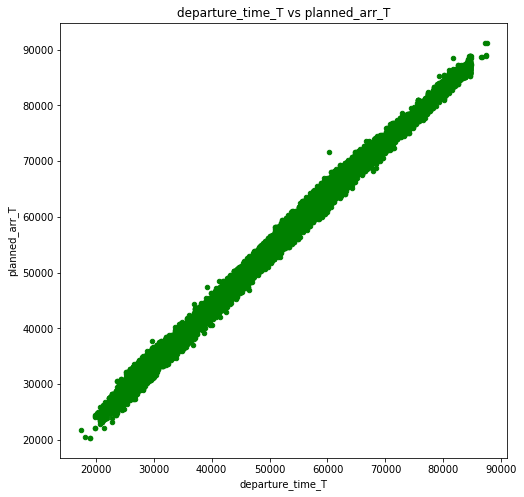

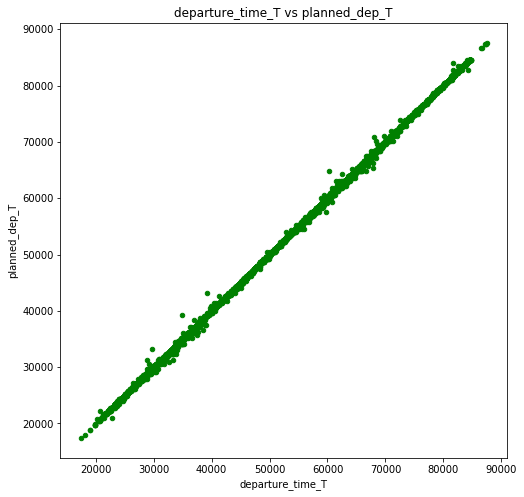

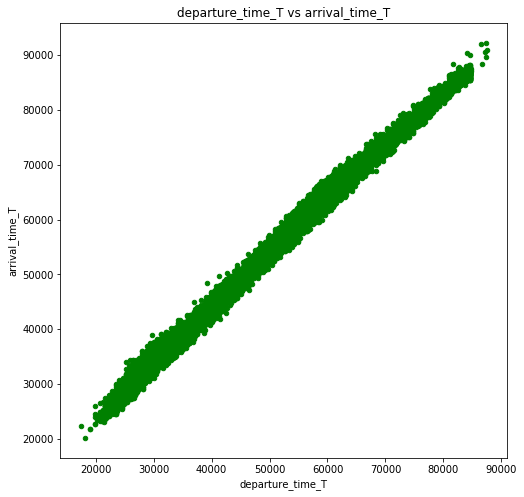

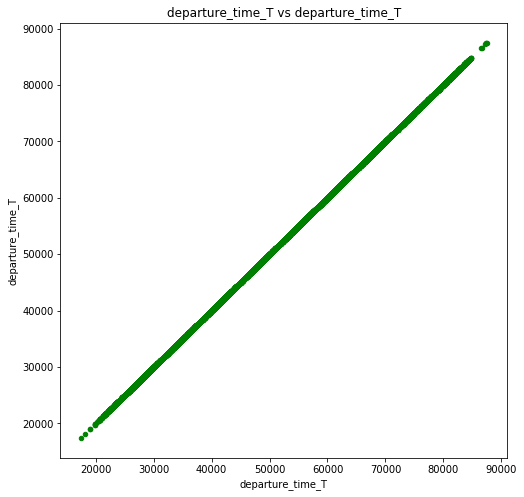

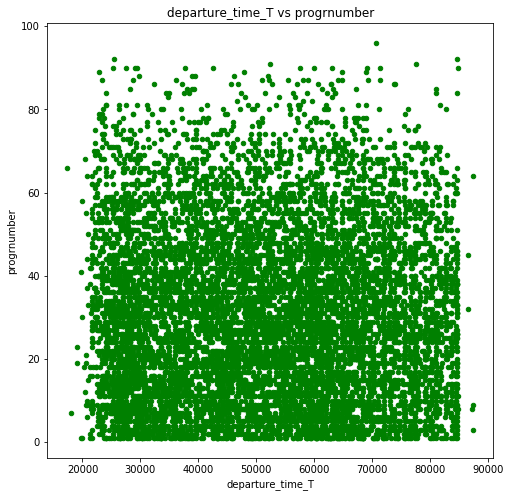

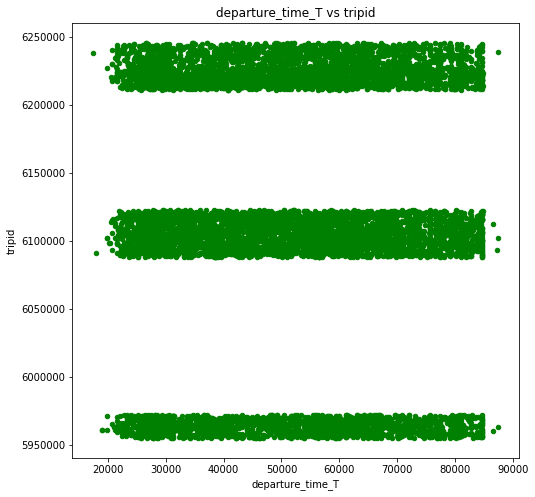

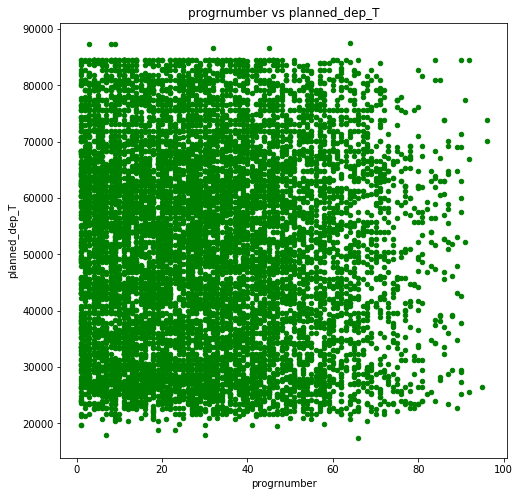

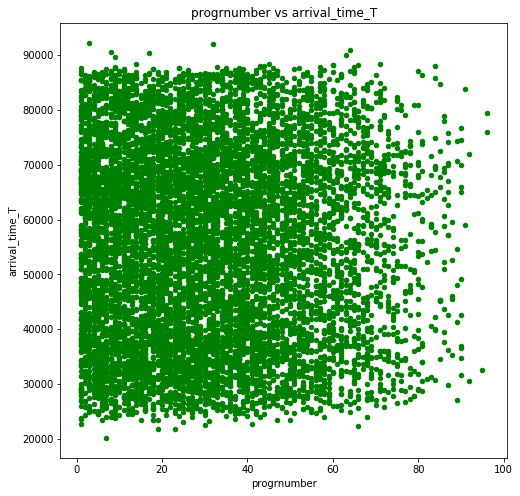

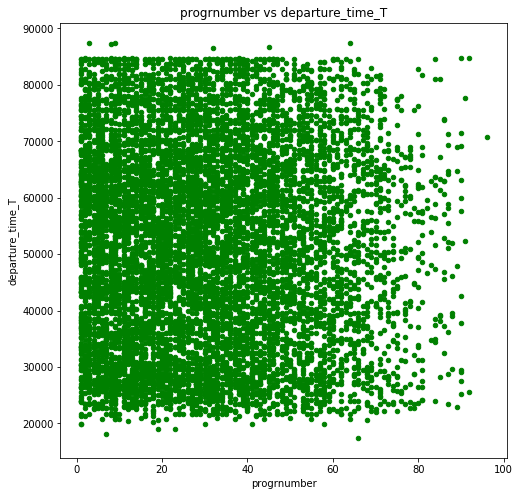

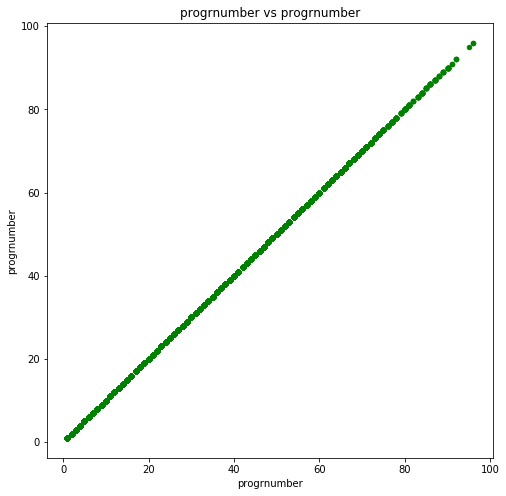

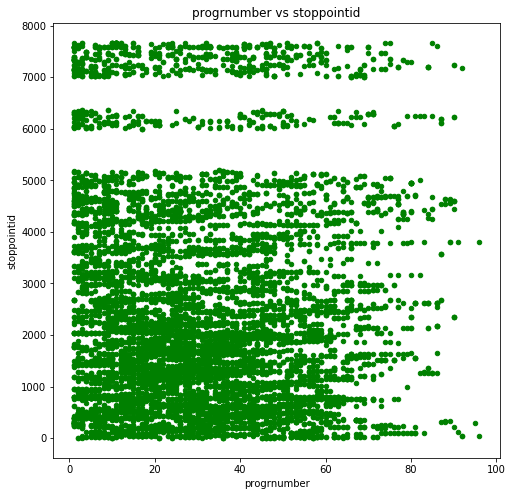

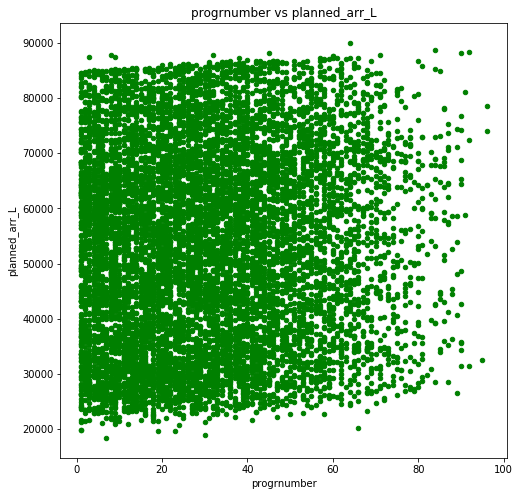

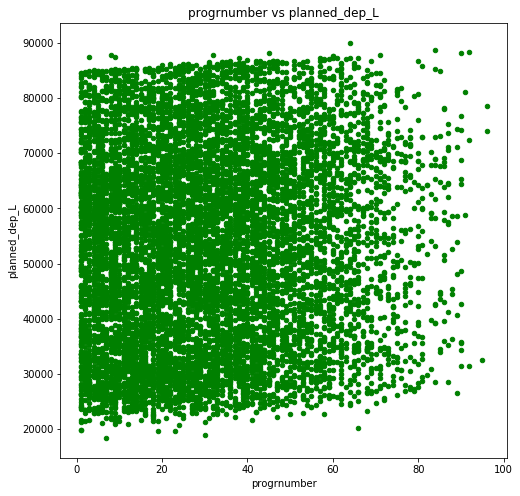

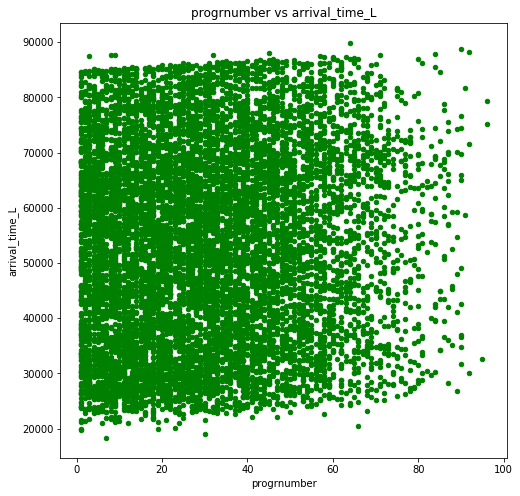

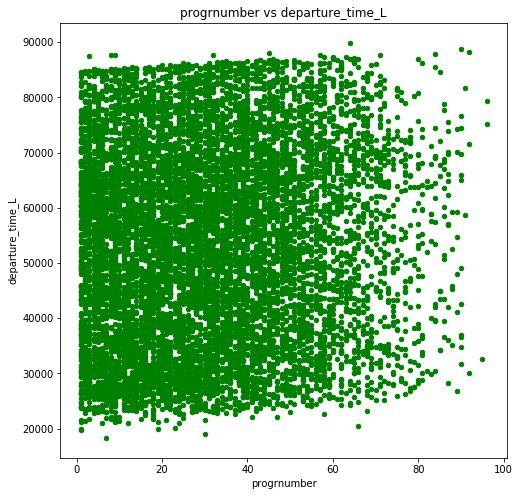

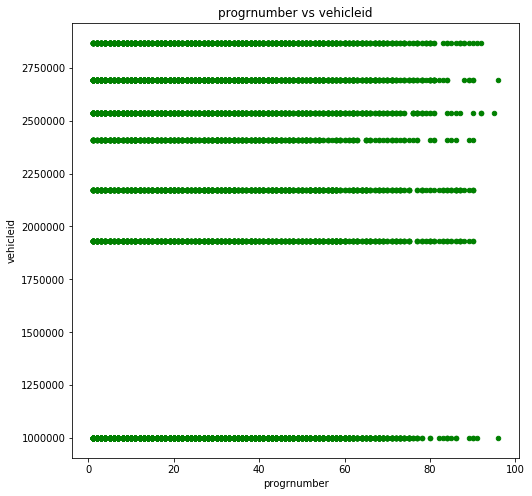

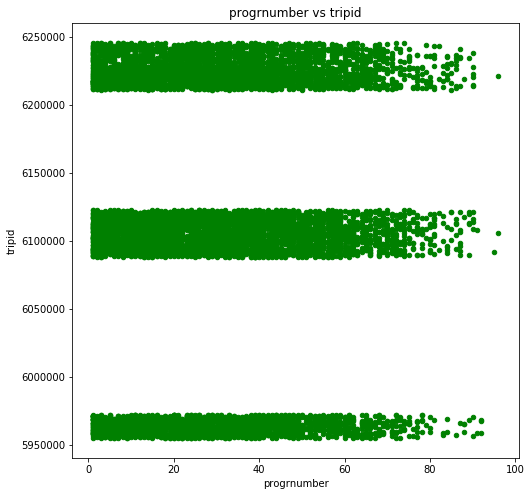

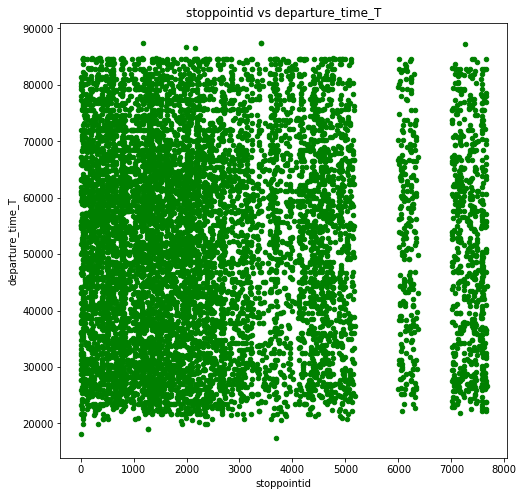

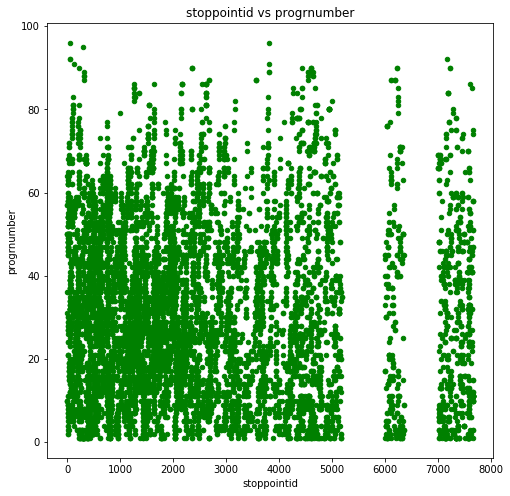

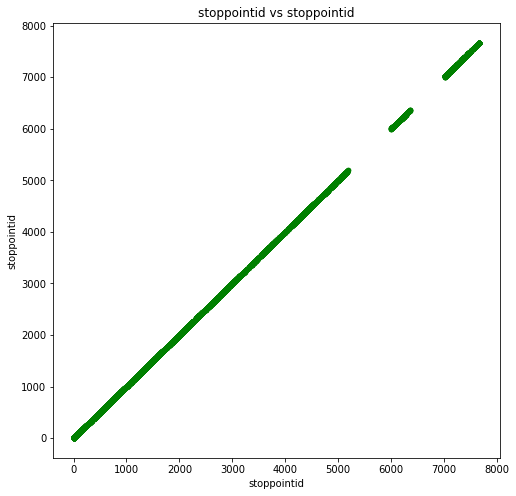

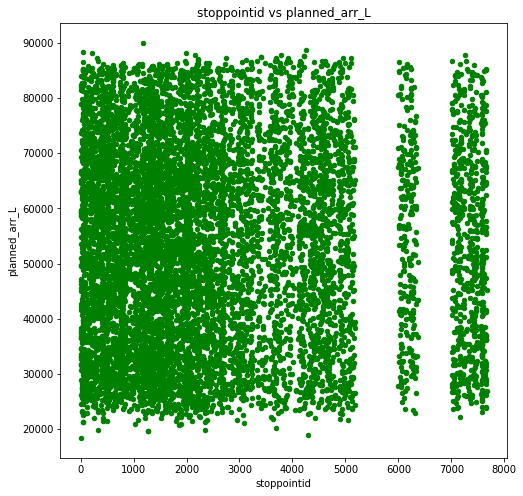

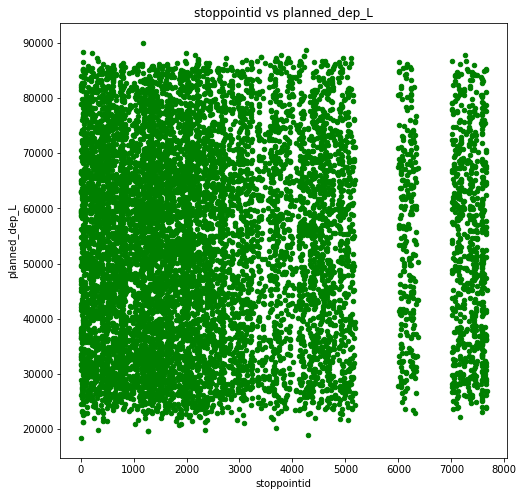

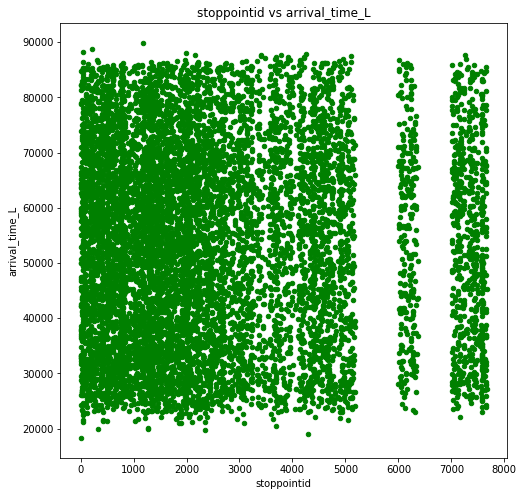

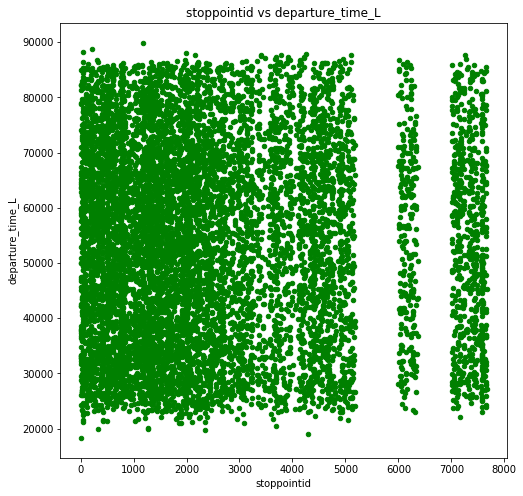

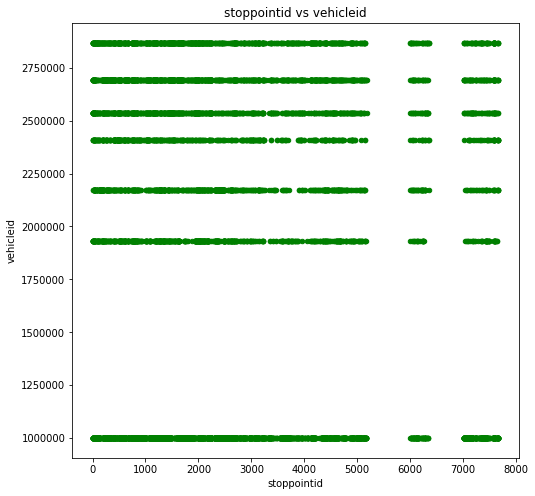

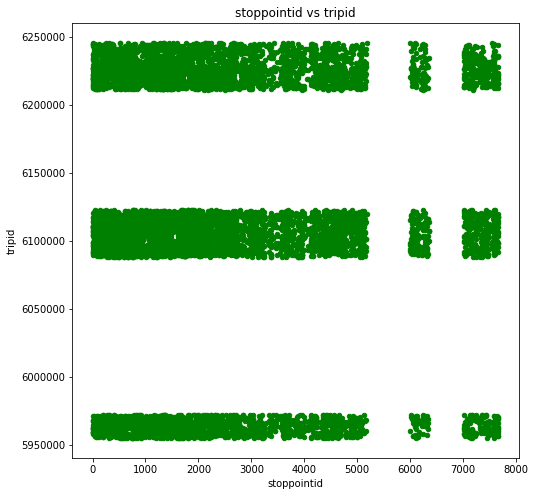

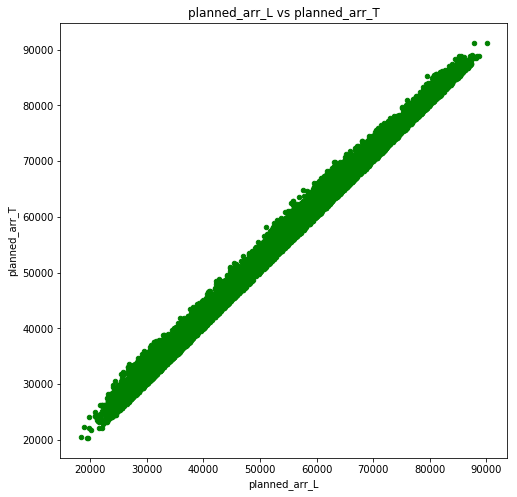

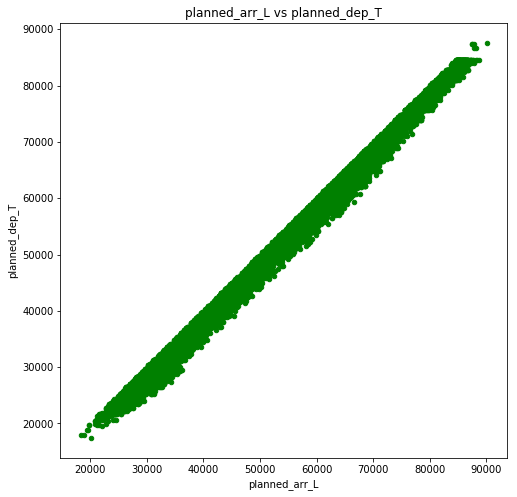

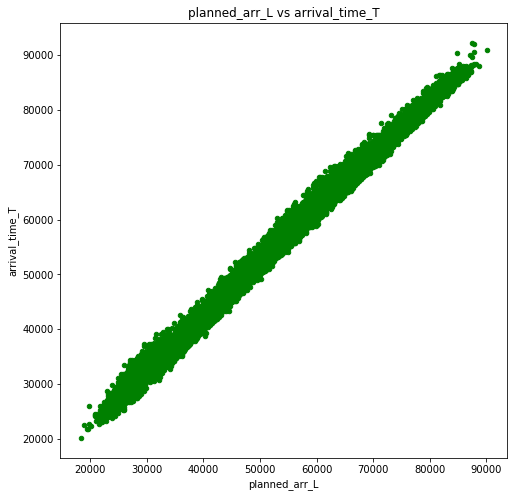

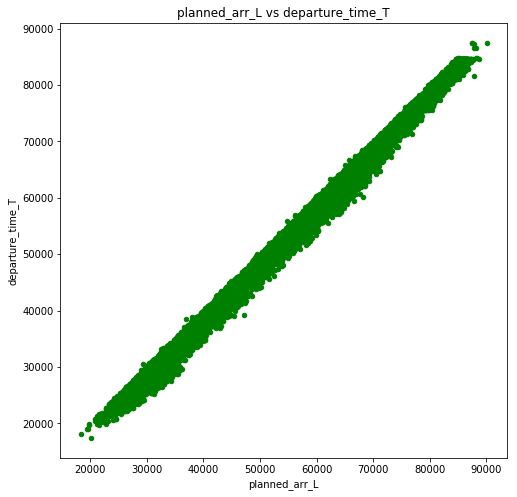

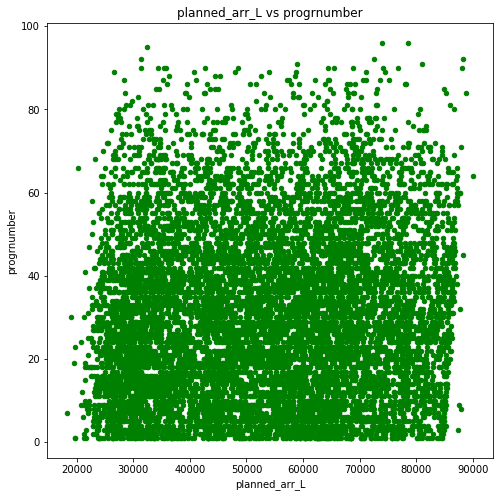

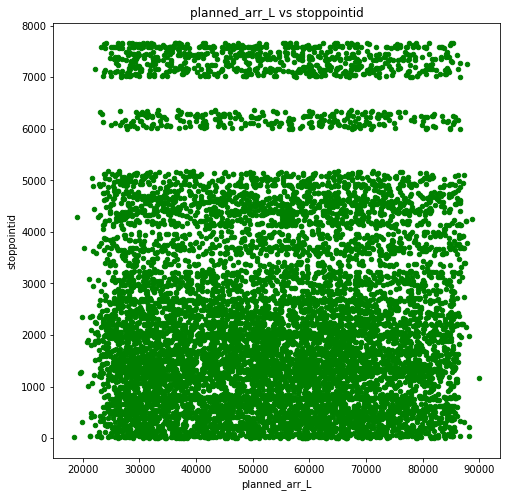

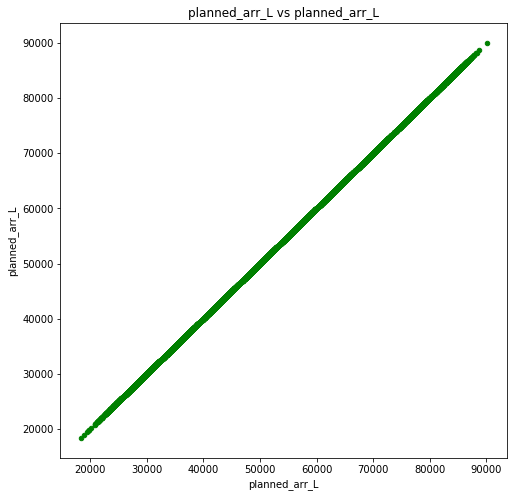

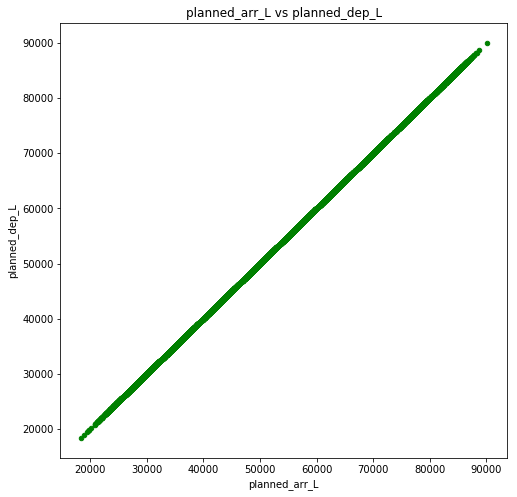

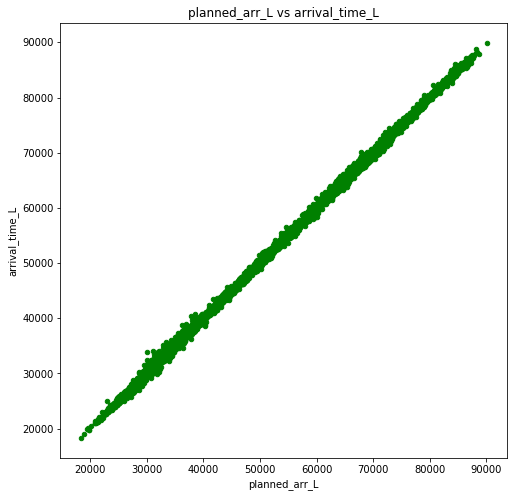

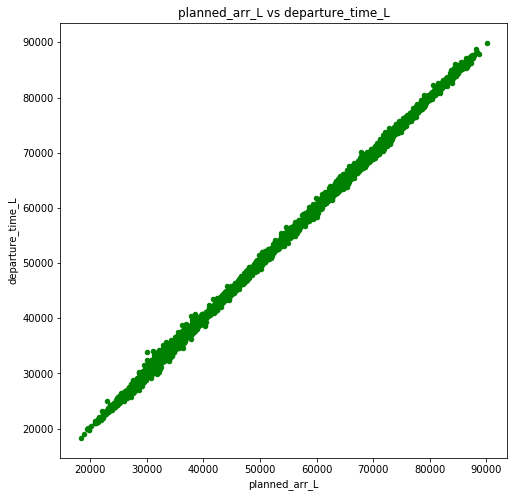

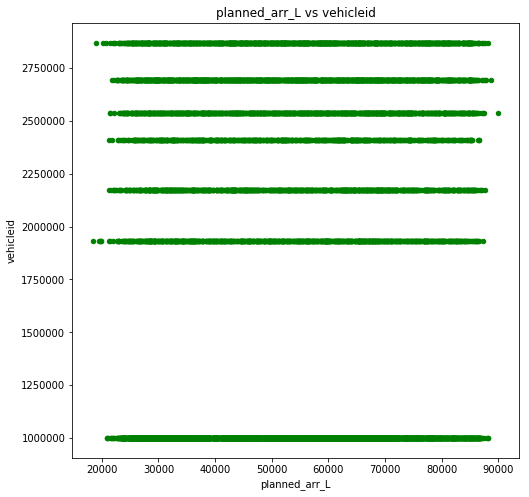

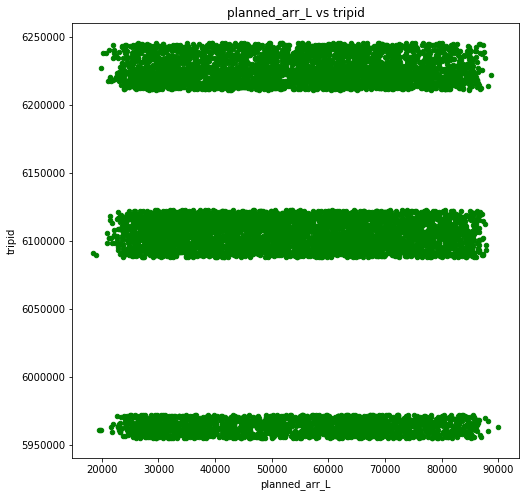

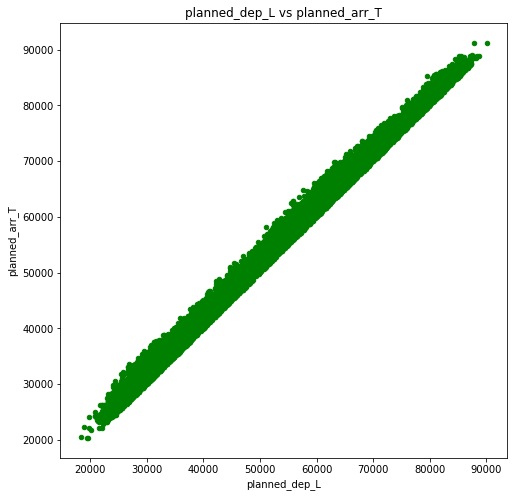

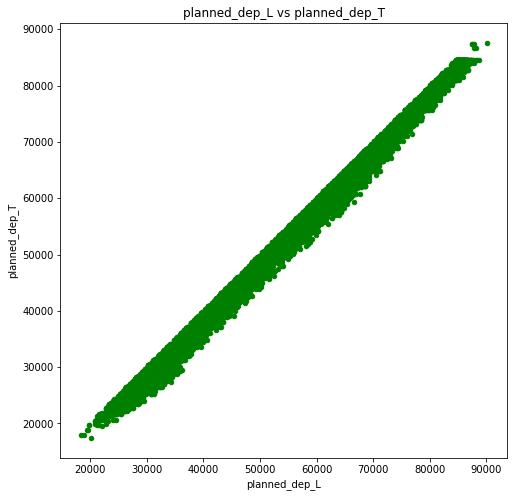

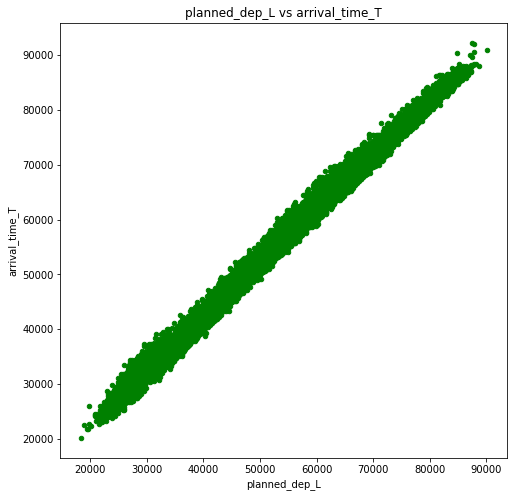

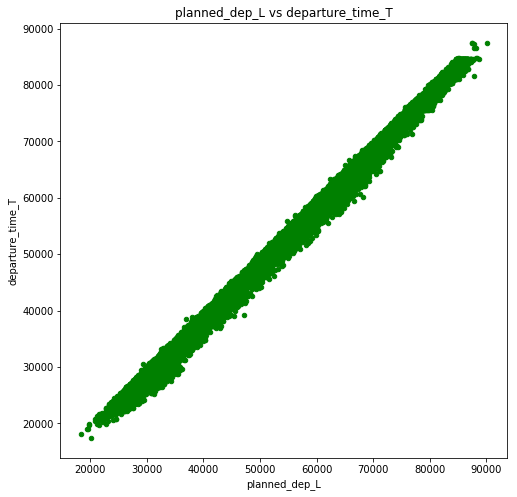

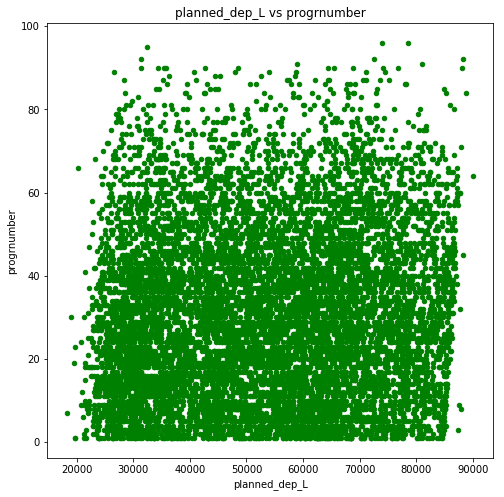

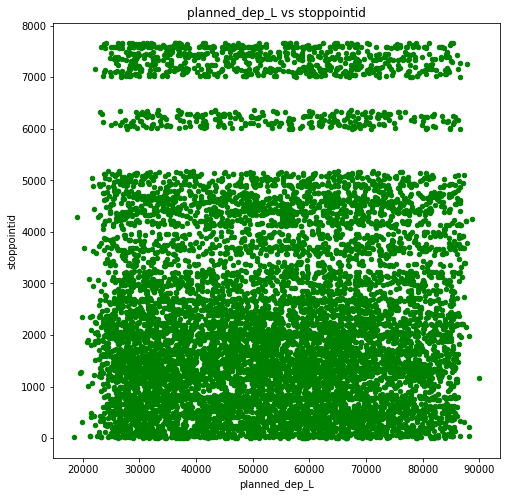

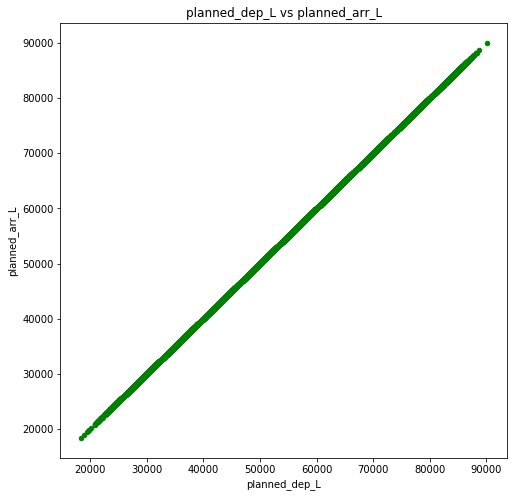

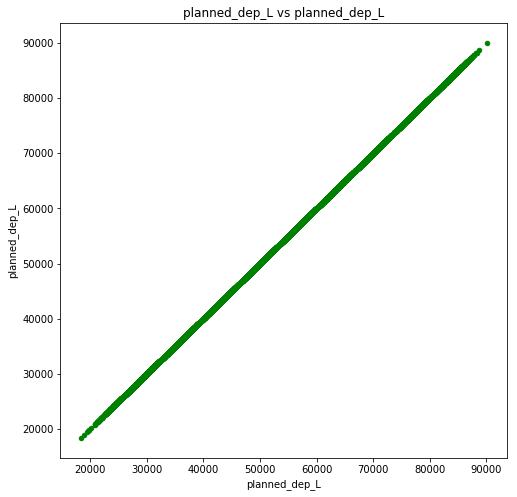

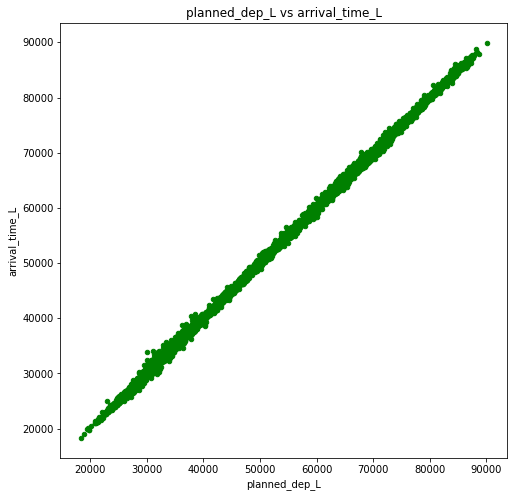

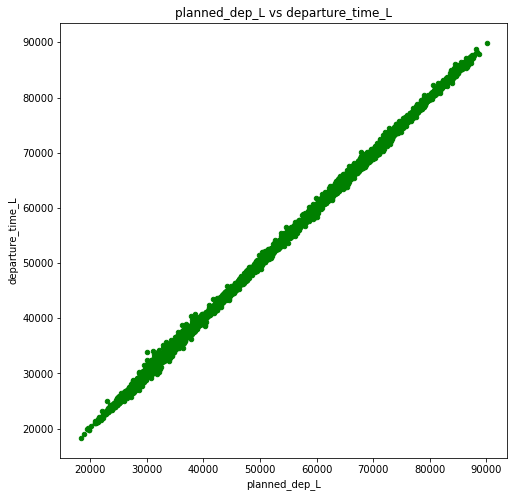

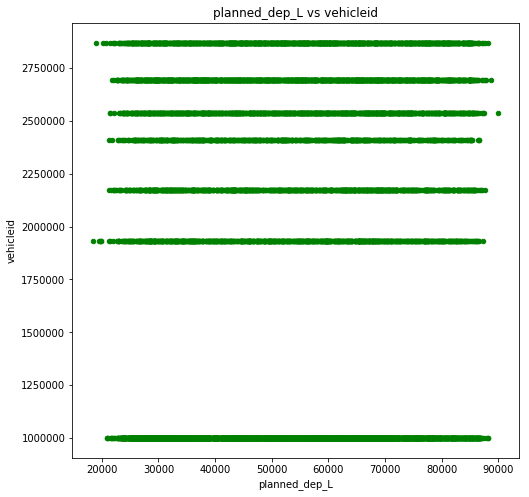

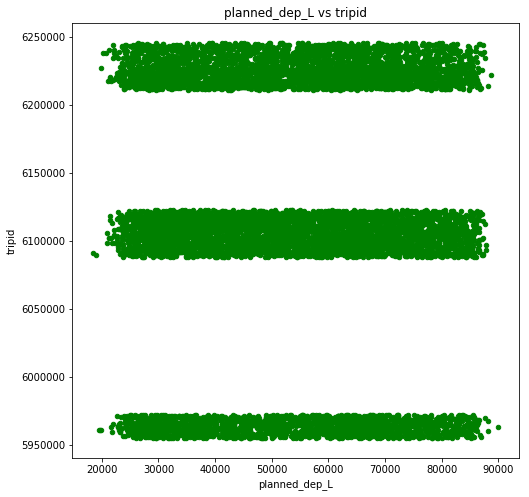

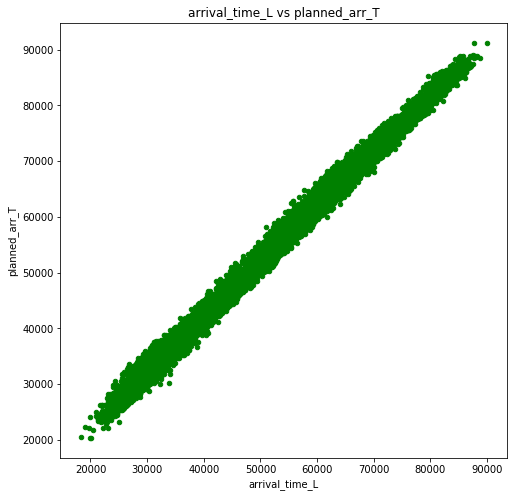

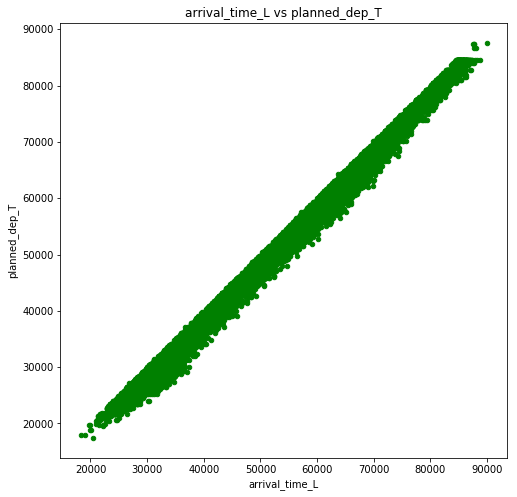

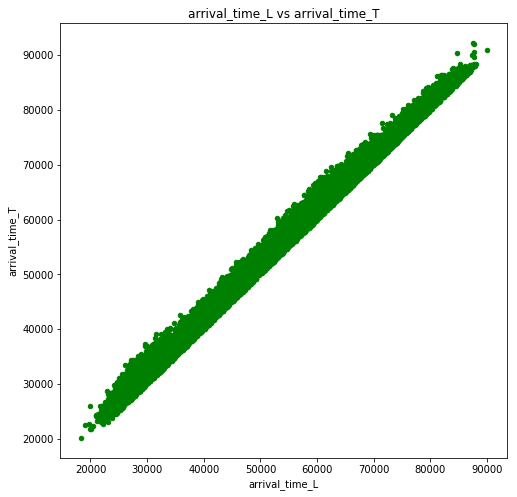

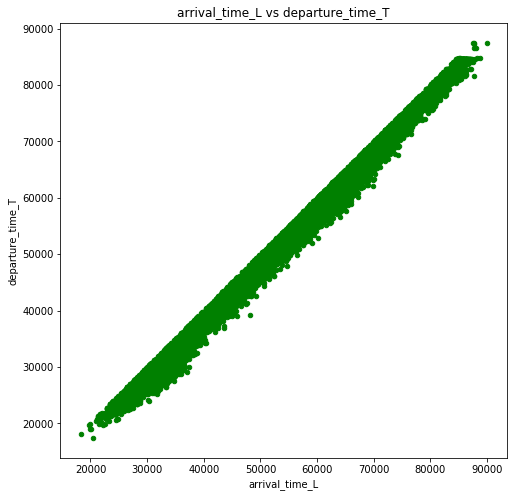

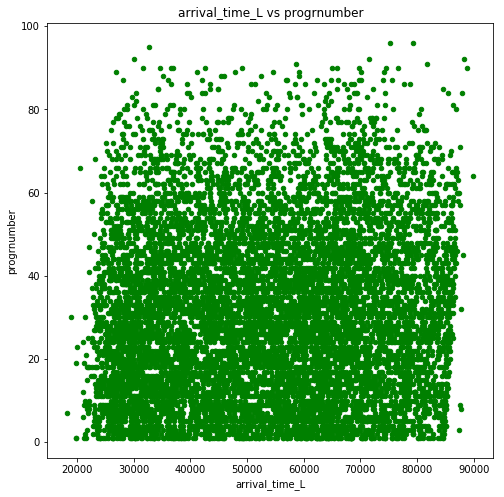

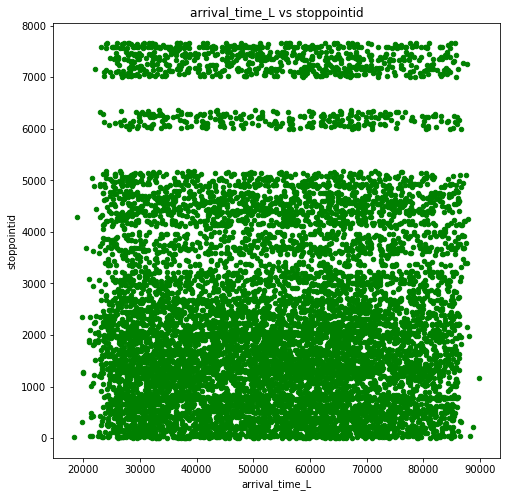

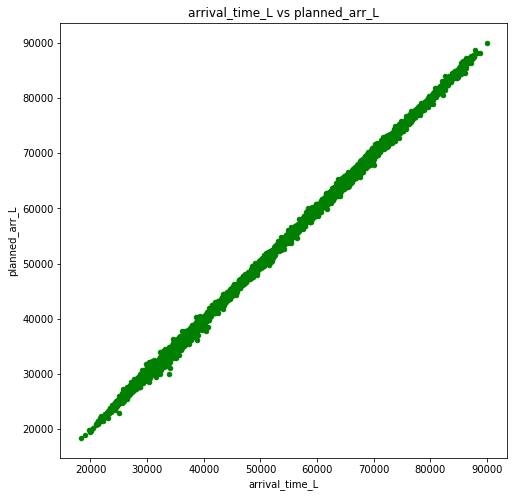

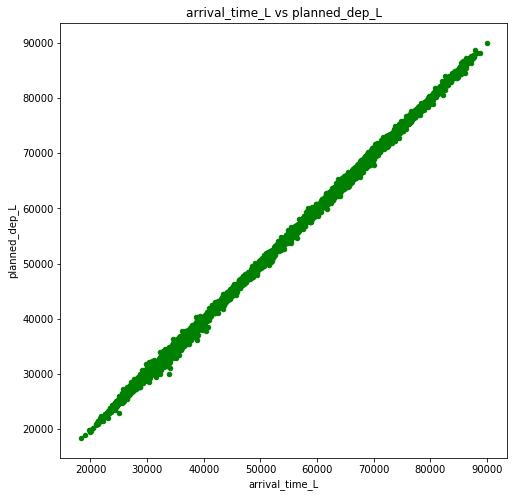

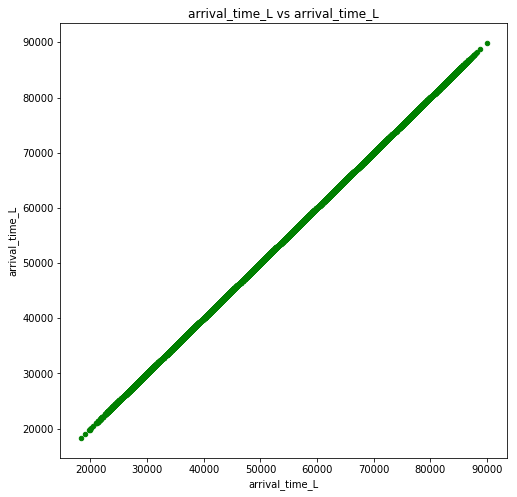

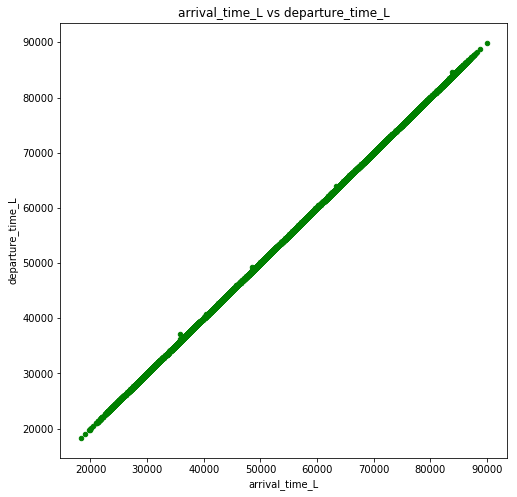

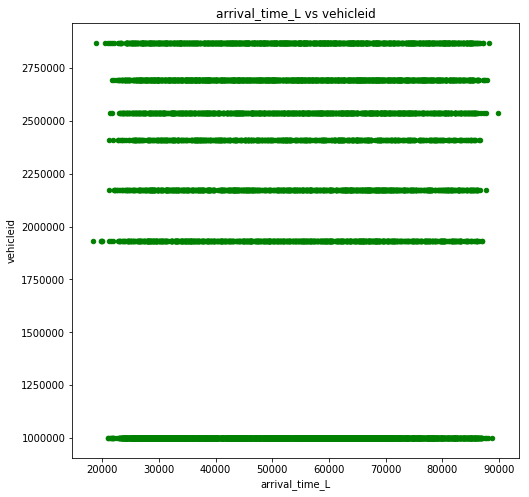

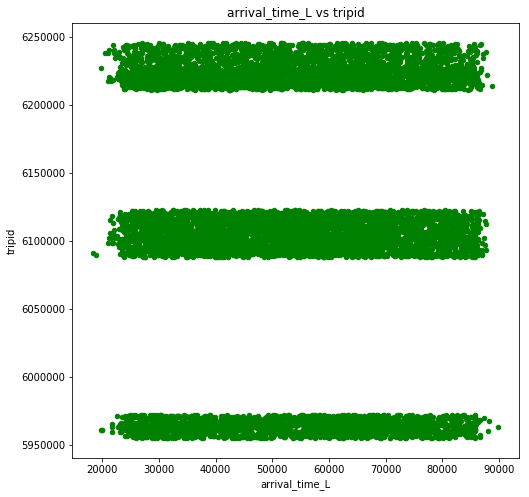

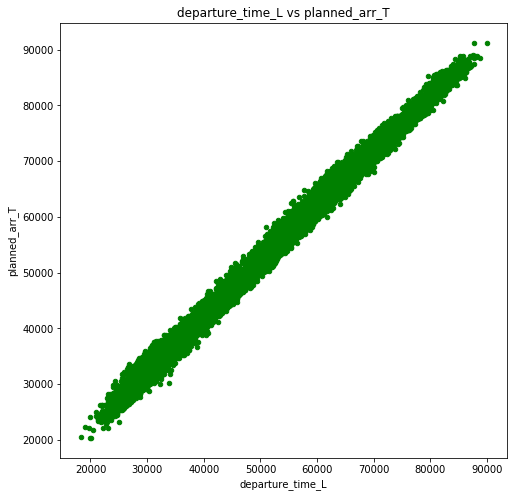

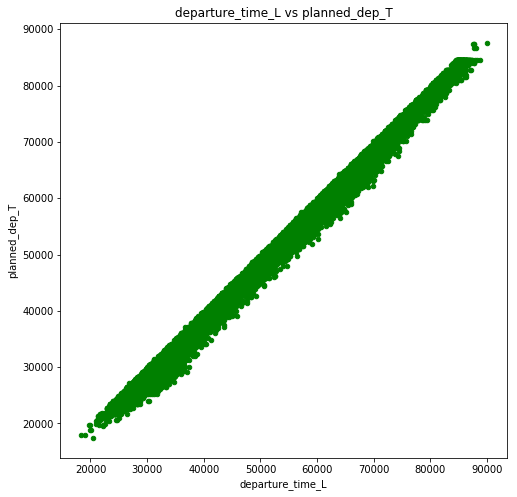

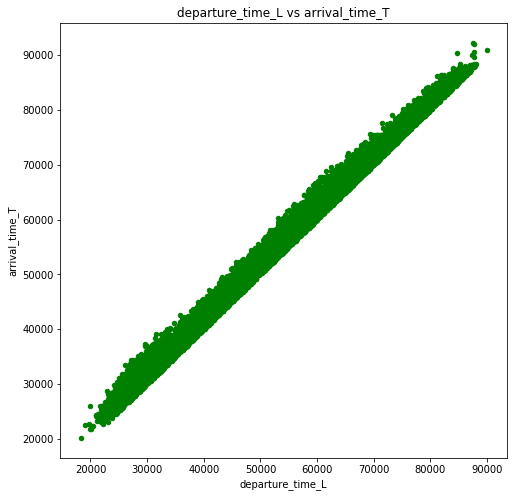

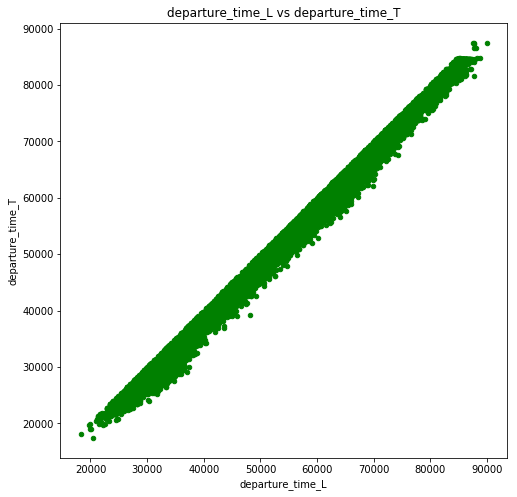

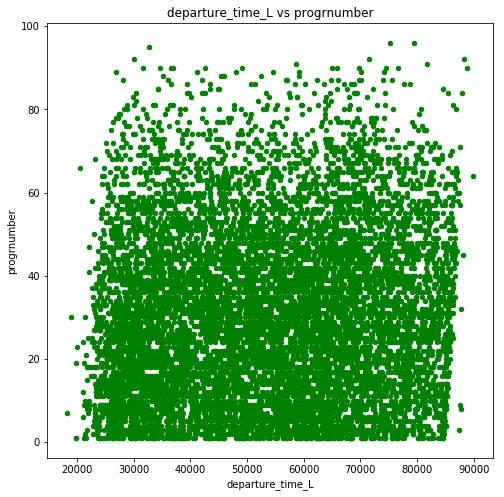

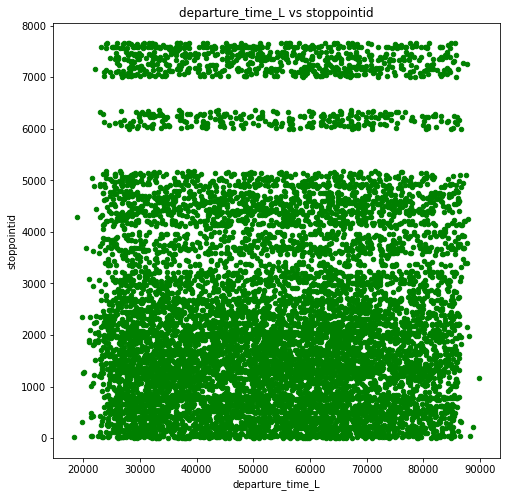

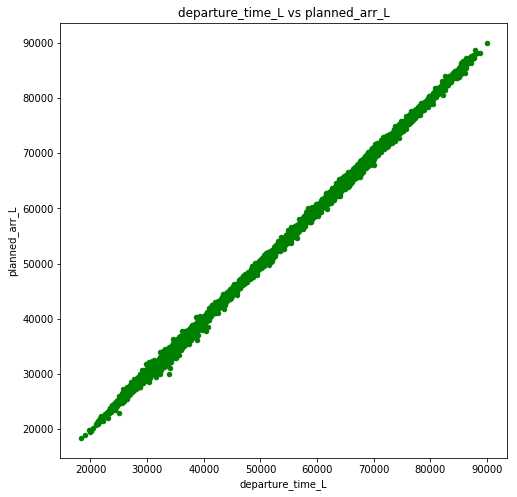

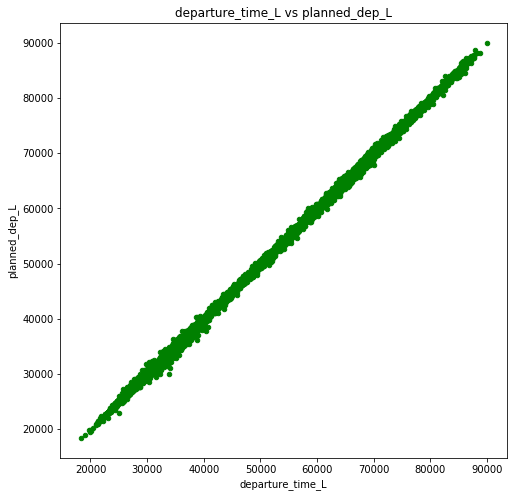

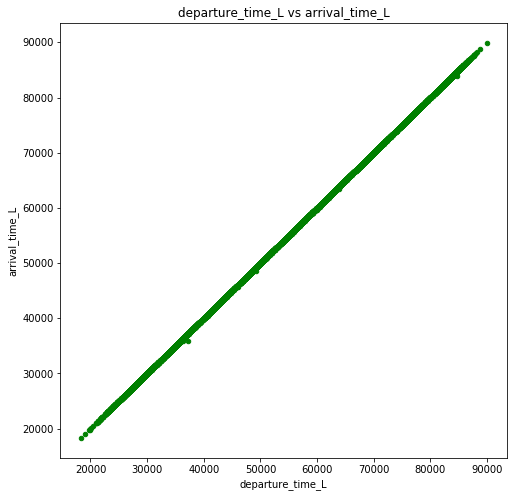

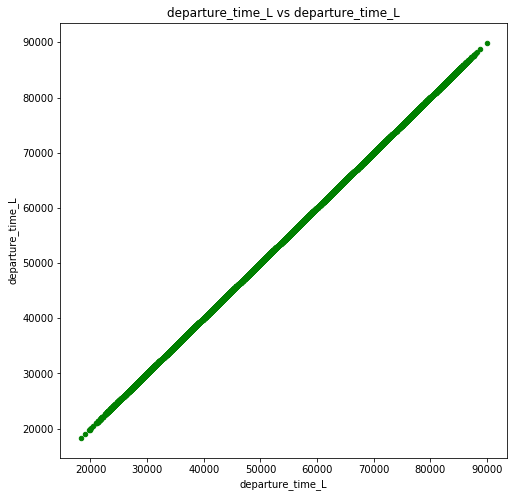

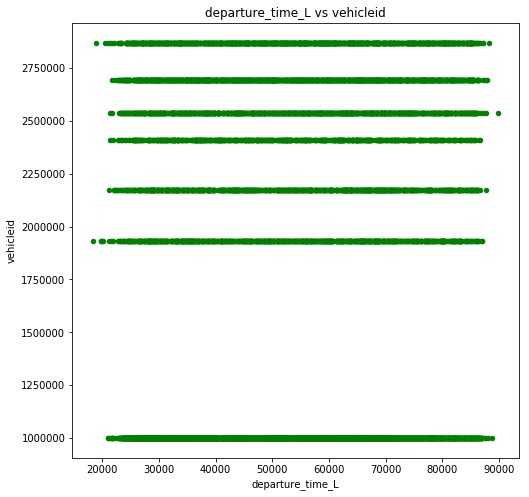

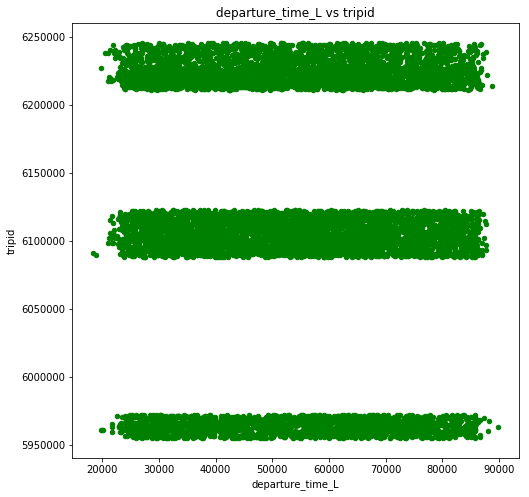

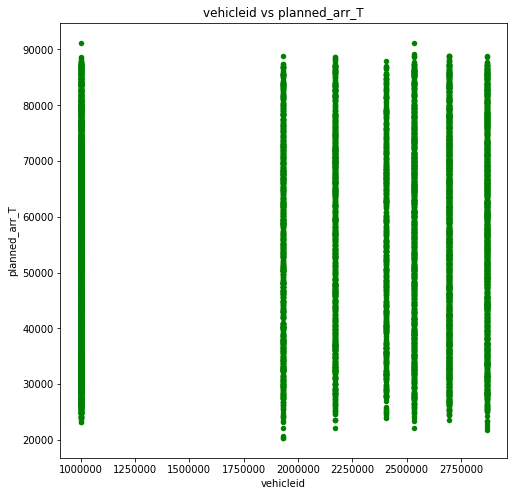

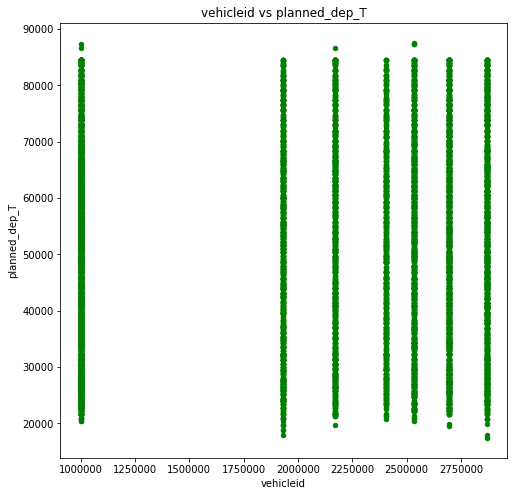

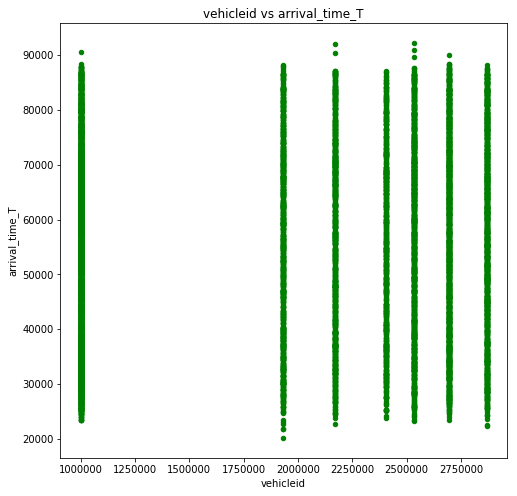

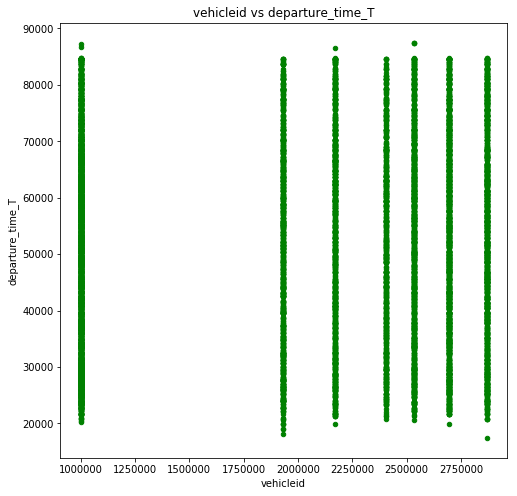

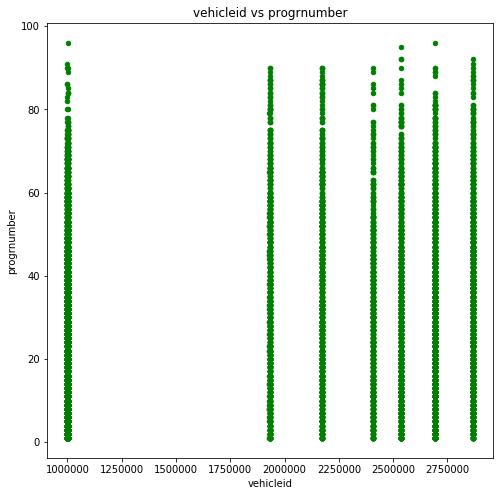

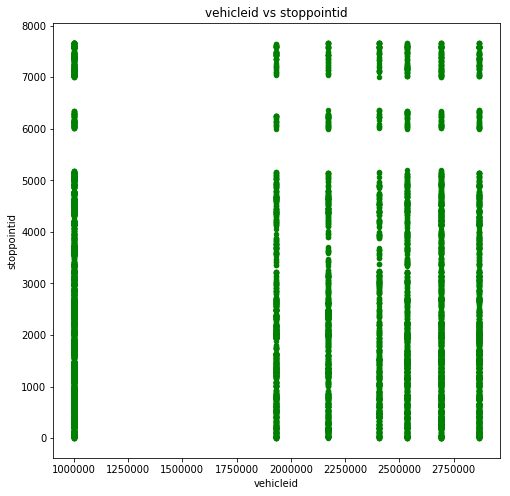

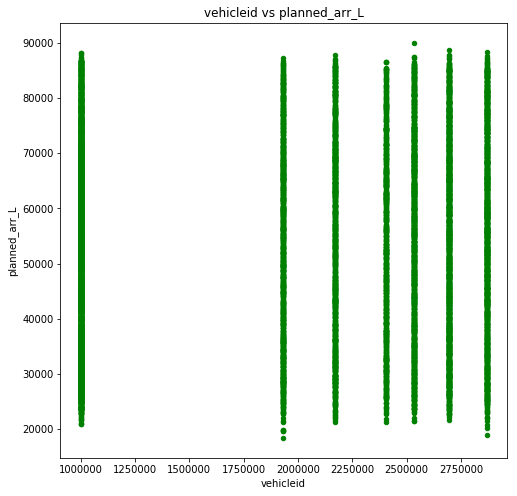

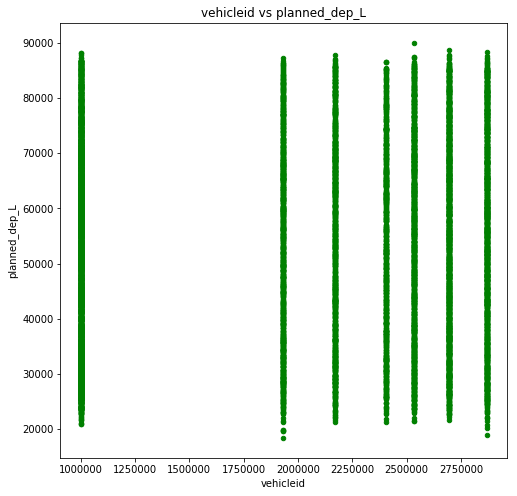

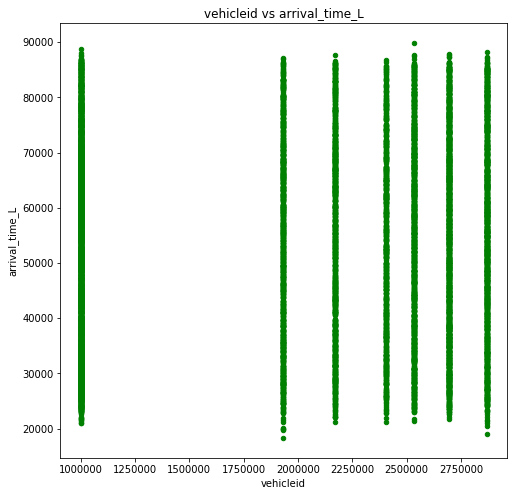

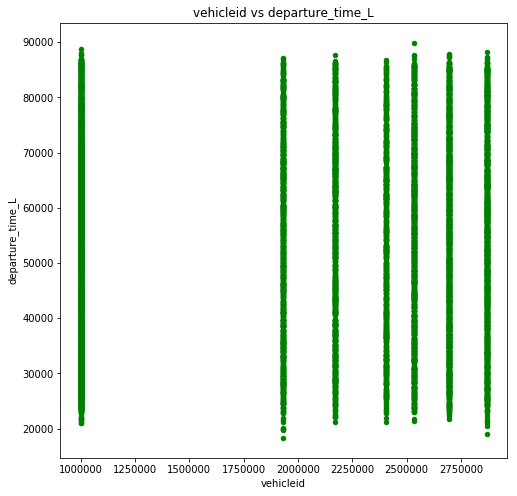

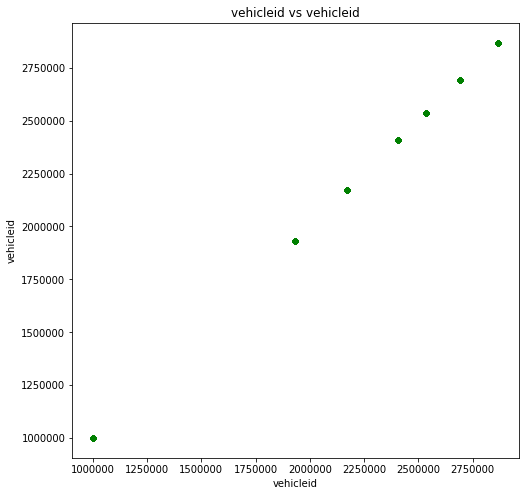

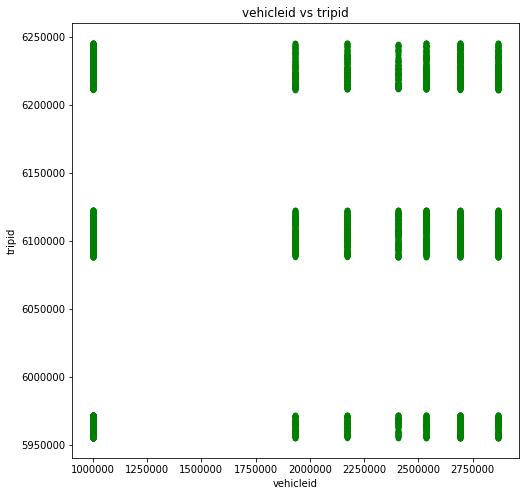

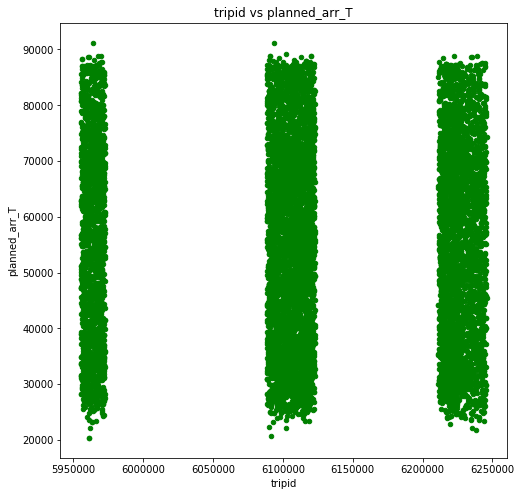

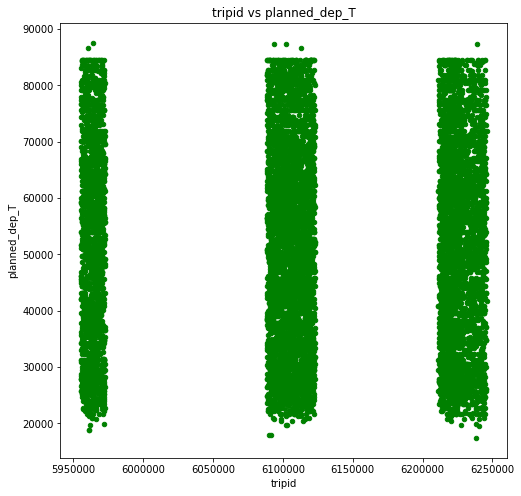

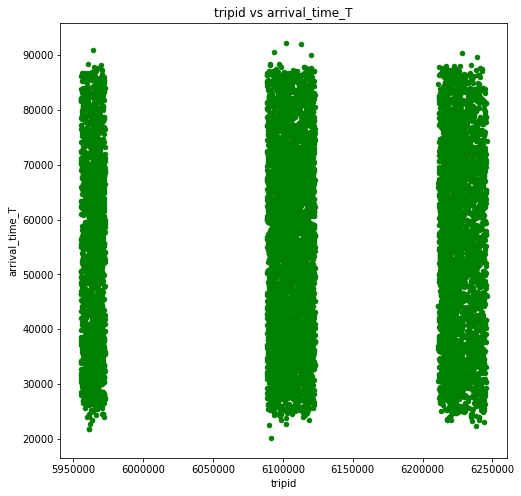

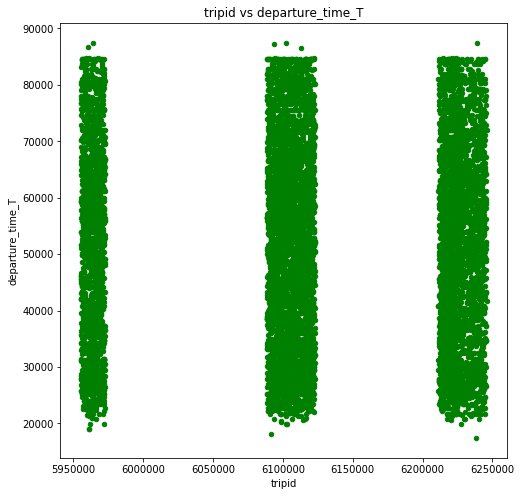

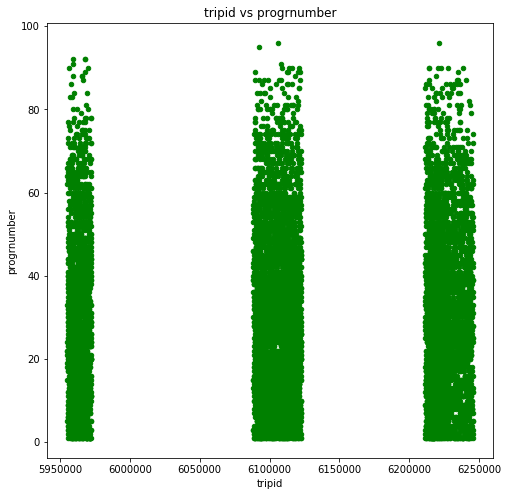

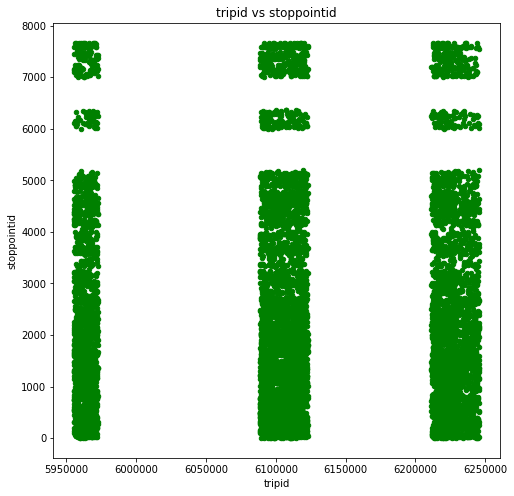

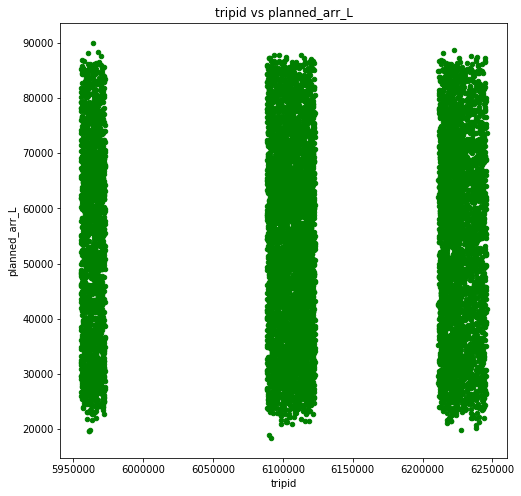

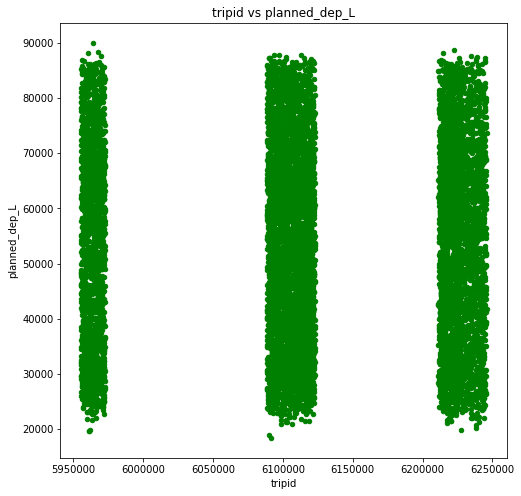

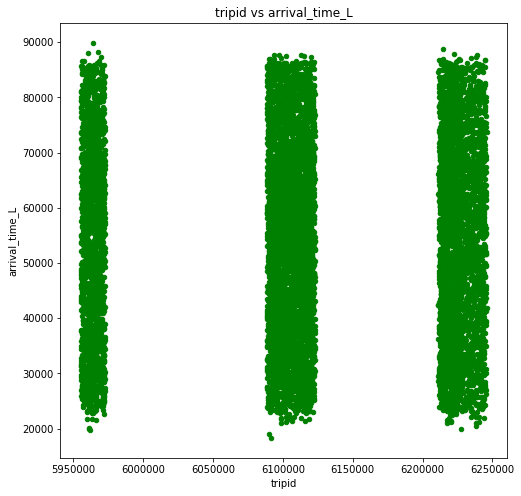

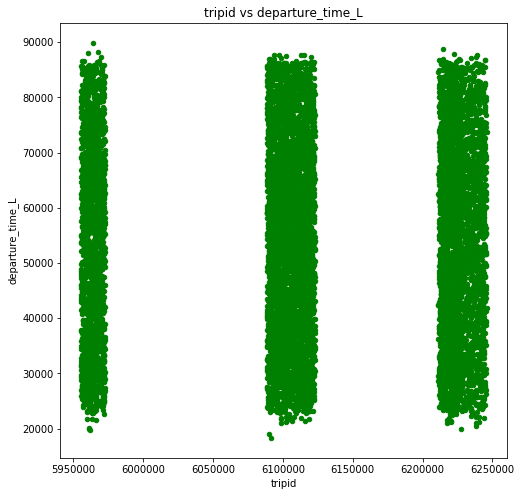

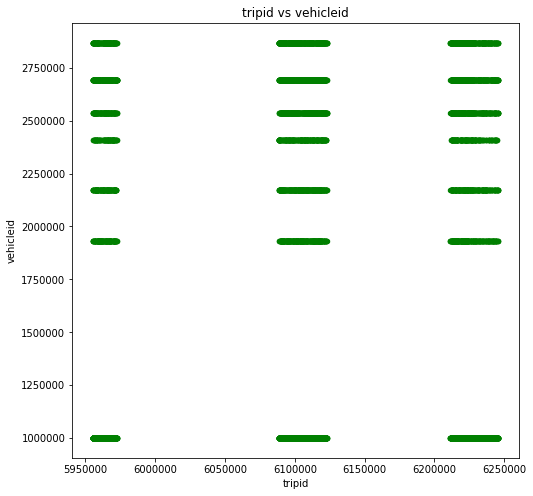

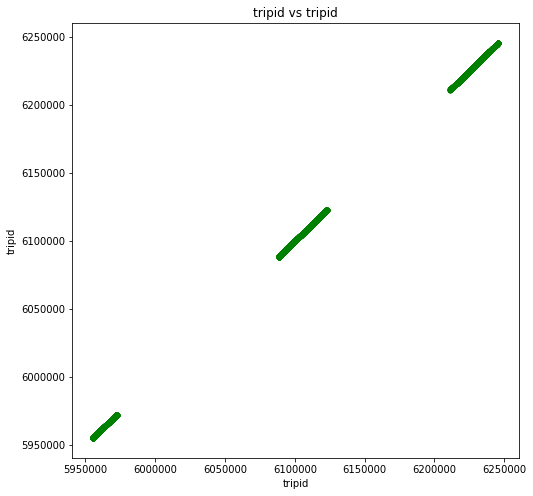

In [39]:
for feature in continuous_columns:
    for feature_ in continuous_columns:
        df1_sample.plot(kind='scatter', x=feature, y=feature_, color="g", figsize=(8,8), title=f"{feature} vs {feature_}")

In [ ]:
# datofserice
# lastupdate

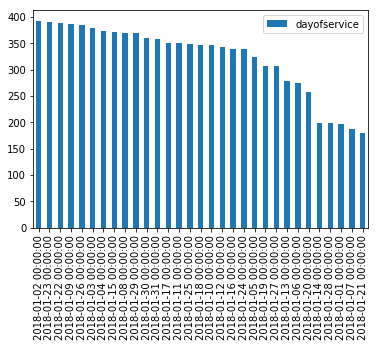

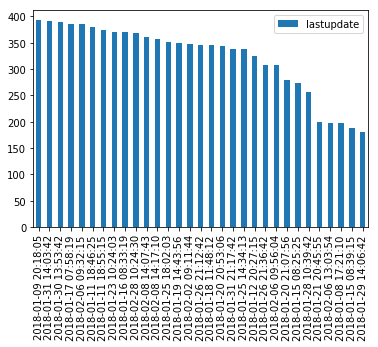

In [41]:
for col in datetime_columns:
    dates = pd.DataFrame(df1_sample[col].astype("datetime64[ns]").value_counts())
    dates.plot(kind="bar")
    plt.show()

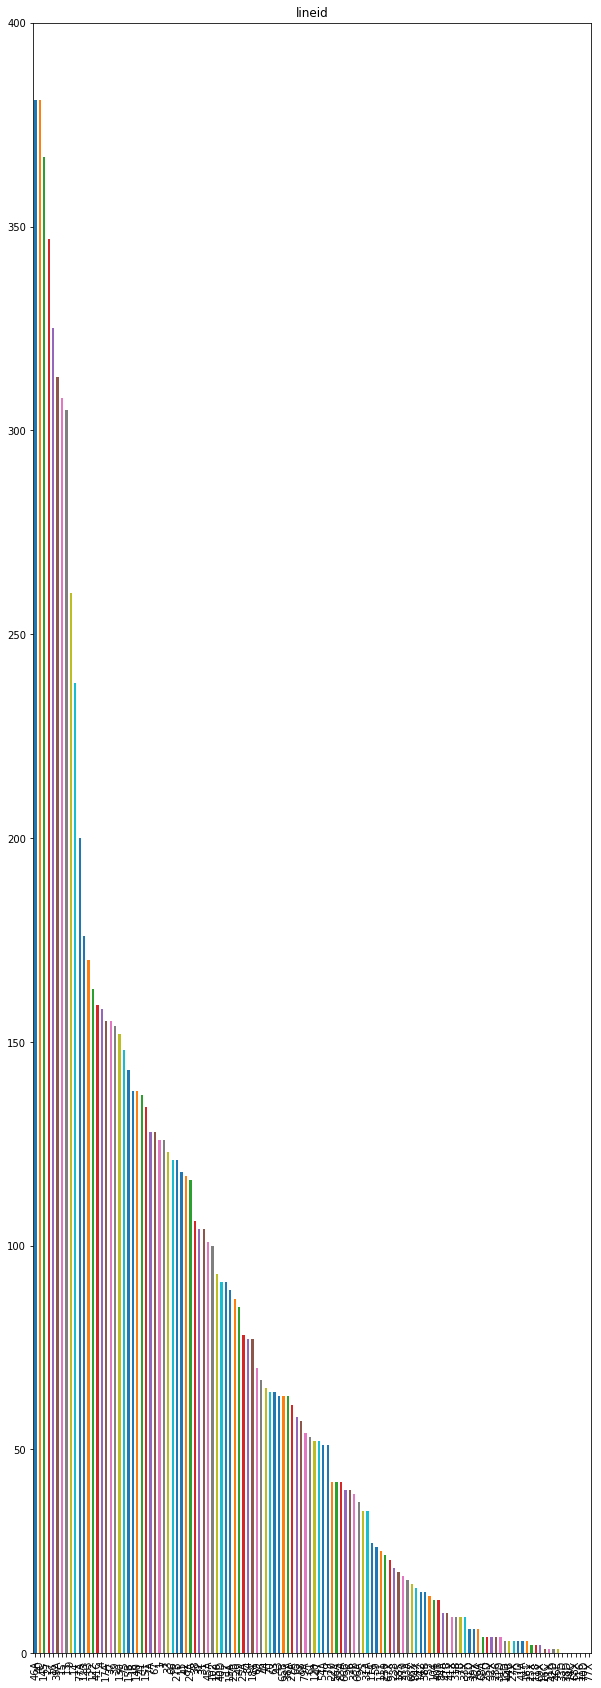

In [43]:
for col in categorical_columns:
    f = df1_sample[col].value_counts().plot(kind='bar', figsize=(20,10))
    plt.title(col)
    plt.show()